# Case 1: The Hidden Reserves 🛢️

The Whisper: Production in a specific region seems unusually high. Could there be undiscovered energy sources like shale oil or geothermal reserves?

# **Objective:**
To determine if the unusually high production in specific regions is indicative of undiscovered energy sources such as shale oil or geothermal reserves.

### **Processing the Data**

Shale oil Production Chart

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
# Mount Google Drive
drive.mount('/content/drive', force_remount=True)

# Set the file paths
shale_oil_path = '/content/drive/MyDrive/Raw Data Jodi DB/world_secondary_shale_oil_no.1.xlsx'
natural_gas_path = '/content/drive/MyDrive/Raw Data Jodi DB/world_secondary_geothermal_no.1.xlsx'

# Read the Excel files
df_shale_oil = pd.read_excel(shale_oil_path, sheet_name='world_secondary_shale_oil_no.1')
df_natural_gas = pd.read_excel(natural_gas_path, sheet_name='jodi-gas_wdb_29233995661745')

# Clean and prepare the natural gas data from df_natural_gas
df_natural_gas.columns = ['Country', 'Product', 'Time', 'Million Standard Cubic Metres', 'Terajoules', '1000 Metric Tons']
df_natural_gas = df_natural_gas.drop([0, 1, 2]).reset_index(drop=True)

# Convert relevant columns to datetime and numeric
df_natural_gas['Time'] = pd.to_datetime(df_natural_gas['Time'])
df_natural_gas['Million Standard Cubic Metres'] = pd.to_numeric(df_natural_gas['Million Standard Cubic Metres'], errors='coerce')

# Summarize total natural gas production for each country
natural_gas_summary = df_natural_gas.groupby('Country')['Million Standard Cubic Metres'].sum().reset_index()
natural_gas_summary = natural_gas_summary.rename(columns={'Million Standard Cubic Metres': 'Natural Gas Production (Million m³)'})

# Calculate the average production to identify high production regions
average_gas_production = natural_gas_summary['Natural Gas Production (Million m³)'].mean()
high_gas_production_countries = natural_gas_summary[natural_gas_summary['Natural Gas Production (Million m³)'] > average_gas_production]

# Manually set the correct column headers for df_shale_oil
df_shale_oil.columns = df_shale_oil.iloc[0]
df_shale_oil = df_shale_oil.drop([0, 1]).reset_index(drop=True)

# Correct the column names
df_shale_oil.columns = ['Time', 'Country', 'Liquefied petroleum gases', 'Naphtha',
       'Motor and aviation gasoline', 'Kerosenes ',
       'of which: kerosene type jet fuel', 'Gas/diesel oil', 'Fuel oil',
       'Other oil products', 'Total oil products', 'Unit', 'BALANCE']

# Convert relevant columns to datetime and numeric
df_shale_oil['Time'] = pd.to_datetime(df_shale_oil['Time'])
df_shale_oil['Total oil products'] = pd.to_numeric(df_shale_oil['Total oil products'], errors='coerce')

# Summarize total shale oil production for each country
shale_oil_summary = df_shale_oil.groupby('Country')['Total oil products'].sum().reset_index()

# Calculate the average production to identify high production regions
average_shale_oil_production = shale_oil_summary['Total oil products'].mean()
high_shale_oil_production_countries = shale_oil_summary[shale_oil_summary['Total oil products'] > average_shale_oil_production]

# Determine the overlapping time range
start_time = max(df_natural_gas['Time'].min(), df_shale_oil['Time'].min())
end_time = min(df_natural_gas['Time'].max(), df_shale_oil['Time'].max())

# Filter data within the overlapping time range
df_natural_gas = df_natural_gas[(df_natural_gas['Time'] >= start_time) & (df_natural_gas['Time'] <= end_time)]
df_shale_oil = df_shale_oil[(df_shale_oil['Time'] >= start_time) & (df_shale_oil['Time'] <= end_time)]

# Summarize production data again for the overlapping period
natural_gas_time_summary = df_natural_gas.groupby(['Country', 'Time'])['Million Standard Cubic Metres'].sum().reset_index()
shale_oil_time_summary = df_shale_oil.groupby(['Country', 'Time'])['Total oil products'].sum().reset_index()

# Identify countries with high production in both natural gas and shale oil
high_production_countries = pd.merge(high_gas_production_countries, high_shale_oil_production_countries, on='Country', how='inner')

# Get the top 10 countries with the highest combined production
top_10_high_production_countries = high_production_countries.nlargest(10, 'Natural Gas Production (Million m³)')

top_10_high_production_countries


Mounted at /content/drive


,Country,Natural Gas Production (Million m³),Total oil products
5,Russian Federation,2969289.000,88897.9990
1,China,923087.000,541598.3372
0,Canada,885948.355,91051.0000
3,Malaysia,279680.000,25164.9635
2,Indonesia,262549.000,35133.6406
4,Mexico,169129.000,31763.0000


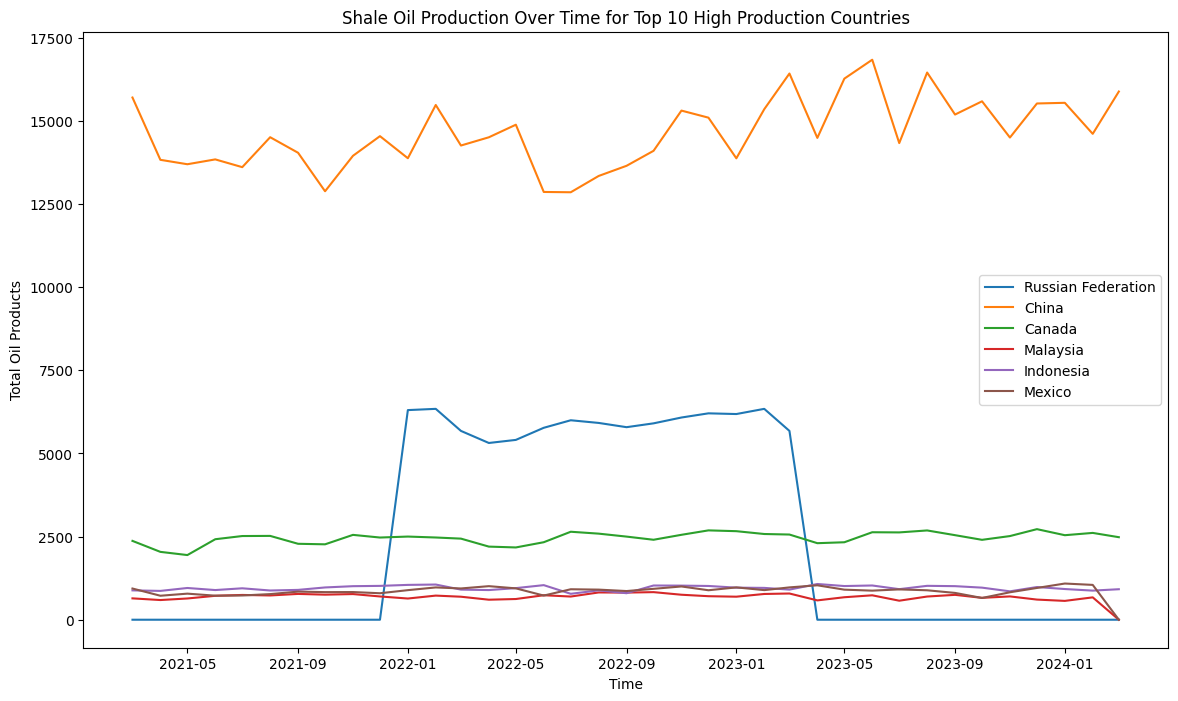

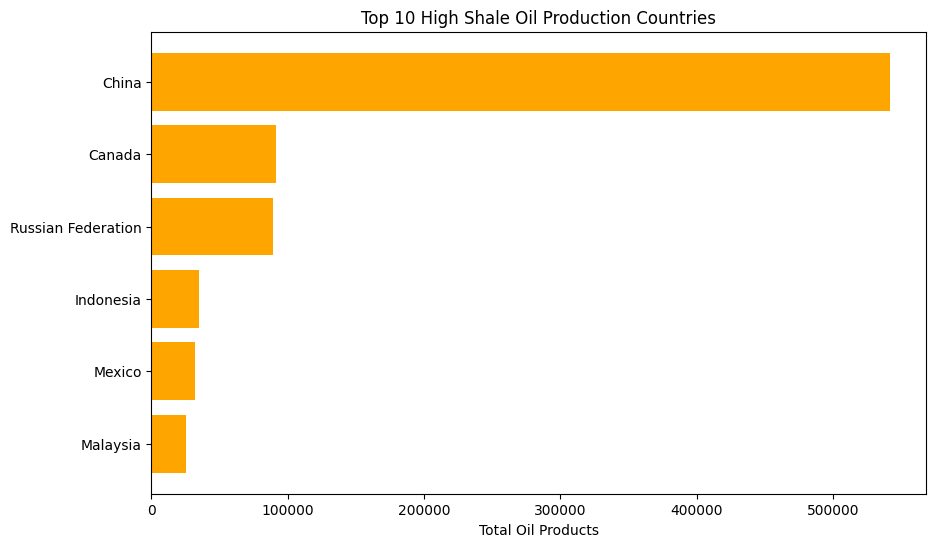

<Figure size 1400x800 with 0 Axes>

In [ ]:
# Plotting Shale Oil Production Over Time for Top 10 High Production Countries
plt.figure(figsize=(14, 8))
for country in top_10_high_production_countries['Country']:
    country_data = shale_oil_time_summary[shale_oil_time_summary['Country'] == country]
    plt.plot(country_data['Time'], country_data['Total oil products'], label=country)

plt.xlabel('Time')
plt.ylabel('Total Oil Products')
plt.title('Shale Oil Production Over Time for Top 10 High Production Countries (From Mar 21- Mar 24)')
plt.legend()
plt.show()


# Sort the data for shale oil production
top_10_high_production_countries = top_10_high_production_countries.sort_values(by='Total oil products', ascending=False)

# Plotting Total Shale Oil Production for Top 10 High Production Countries
plt.figure(figsize=(10, 6))
plt.barh(top_10_high_production_countries['Country'], top_10_high_production_countries['Total oil products'], color='orange')
plt.xlabel('Total Oil Products')
plt.title('Top 10 High Shale Oil Production Countries')
plt.gca().invert_yaxis()
plt.show()

# Add a combined metric for sorting the combined chart
top_10_high_production_countries['Combined Production'] = top_10_high_production_countries['Natural Gas Production (Million m³)'] + top_10_high_production_countries['Total oil products']

# Sort the data by combined production
top_10_high_production_countries = top_10_high_production_countries.sort_values(by='Combined Production', ascending=False)

# High Production in Both Natural Gas and Shale Oil
plt.figure(figsize=(14, 8))
bar_width = 0.4
index = range(len(top_10_high_production_countries['Country']))



>  *In this chart, it is shown that China's shale oil production is significantly
higher than that of other countries. Following China is Russia, but the data we have for Russia only covers from early 2022 until March 2023. Despite this limited timeframe, Russia's average production is still higher than other countries except for China. Canada comes next after Russia.*


**Russia:**
Shale Oil Production: High but not the highest (88,897.9990)

**China:**
Shale Oil Production: Extremely high (541,598.3372)

**Canada:**
Shale Oil Production: High (91,051.0000)

**Indonesia:**
Shale Oil Production: Moderate (35,133.6406)

**Malaysia:**
Shale Oil Production: Moderate (25,164.9635)

**Mexico:**
Shale Oil Production: Moderate (31,763.0000)

*Unit in Thousand Barrels per day (kb/d)*

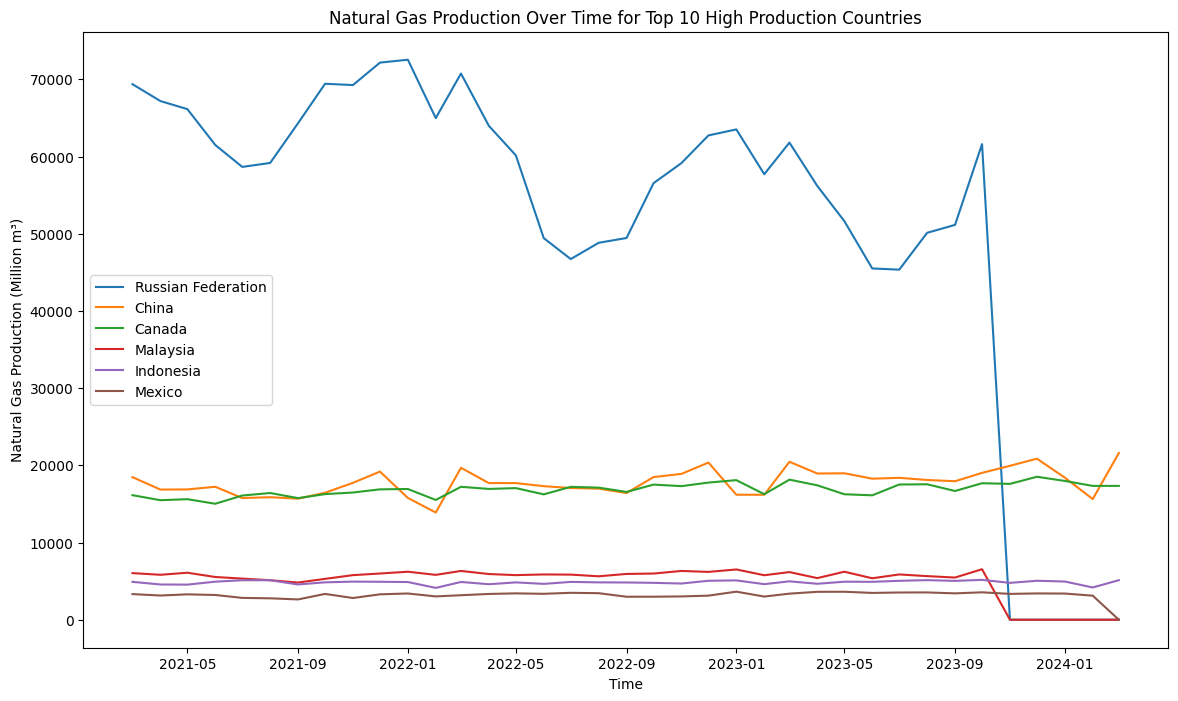

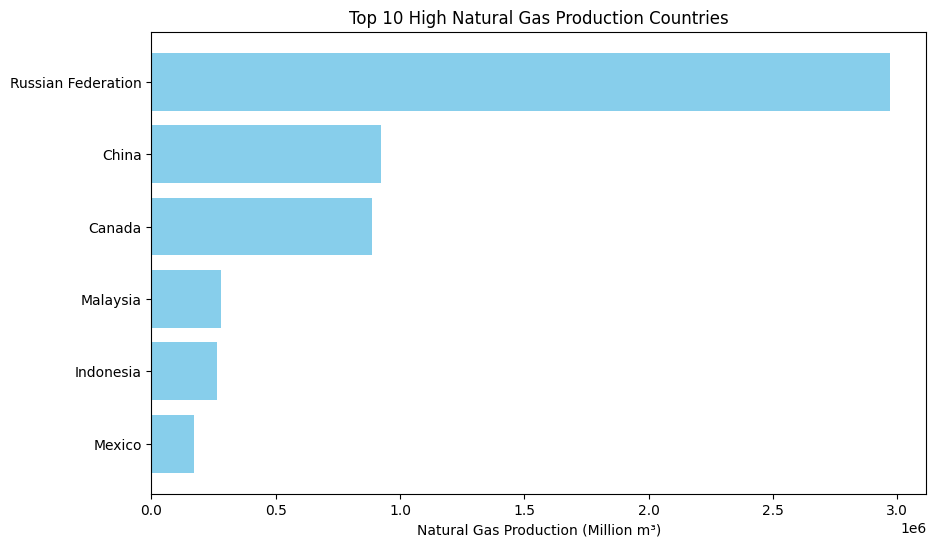

In [ ]:
# Sort the data for plotting
top_10_high_production_countries = top_10_high_production_countries.sort_values(by='Natural Gas Production (Million m³)', ascending=False)

# Plotting Natural Gas Production Over Time for Top 10 High Production Countries
plt.figure(figsize=(14, 8))
for country in top_10_high_production_countries['Country']:
    country_data = natural_gas_time_summary[natural_gas_time_summary['Country'] == country]
    plt.plot(country_data['Time'], country_data['Million Standard Cubic Metres'], label=country)

plt.xlabel('Time')
plt.ylabel('Natural Gas Production (Million m³)')
plt.title('Natural Gas Production Over Time for Top 10 High Production Countries (From Mar 21- Mar 24)')
plt.legend()
plt.show()
# Plotting Total Natural Gas Production for Top 10 High Production Countries
plt.figure(figsize=(10, 6))
plt.barh(top_10_high_production_countries['Country'], top_10_high_production_countries['Natural Gas Production (Million m³)'], color='skyblue')
plt.xlabel('Natural Gas Production (Million m³)')
plt.title('Top 10 High Natural Gas Production Countries')
plt.gca().invert_yaxis()
plt.show()

In the natural gas section, Russia far surpasses other countries in production. It is followed by China and Canada.


**Russia:**
Natural Gas Production: Exceptionally high (2,969,289 million m³)

**China:**
Natural Gas Production: Very high (923,087 million m³)

**Canada:**
Natural Gas Production: High (885,948 million m³)

**Indonesia:**
Natural Gas Production: Moderate (262,549 million m³)

**Malaysia:**
Natural Gas Production: Moderate (279,680 million m³)

**Mexico:**
Natural Gas Production: Moderate (169,129 million m³)

In [ ]:
# Plotting both Natural Gas and Shale Oil on the same graph
plt.barh(index, top_10_high_production_countries['Natural Gas Production (Million m³)'], bar_width, label='Natural Gas Production (Million m³)', color='skyblue')
plt.barh(index, top_10_high_production_countries['Total oil products'], bar_width, left=top_10_high_production_countries['Natural Gas Production (Million m³)'], label='Total Oil Products', color='orange')

plt.xlabel('Production')
plt.yticks(index, top_10_high_production_countries['Country'])
plt.title('Top 10 Countries with High Production in Both Natural Gas and Shale Oil')
plt.legend()
plt.gca().invert_yaxis()
plt.show()

## **Findings**:



The analysis has revealed several countries with high production levels in both natural gas and shale oil. These countries include:


1.   Canada
2.   China
3.   Indonesia
4.   Malaysia
5.   Mexico
6.   Russian Federation




#### **Potential Undiscovered Energy Sources:**

#### **Russia:**
**Natural Gas:** Russia is one of the world’s largest producers of natural gas, with extensive reserves. The high production is aligned with known reserves, and the high production rates are supported by significant infrastructure and technology.

**Shale Oil**: Russia also has large known shale oil reserves, particularly in the Bazhenov Formation.

**Source:**
The EIA reports that Russia holds the largest natural gas reserves in the world and significant oil reserves, with ongoing exploration activities aimed at discovering new fields (https://www.eia.gov/international/analysis/country/RUS).

#### **China:**
**Natural Gas:** China has been aggressively developing its natural gas reserves to reduce its reliance on coal. The high production is consistent with known reserves.

**Shale Oil:** China’s exceptionally high shale oil production suggests extensive reserves and possibly undiscovered potential, especially in the Sichuan and Ordos Basins.

**Source:**
According to the U.S. Energy Information Administration (EIA), China has the world's largest technically recoverable shale gas resources (https://www.eia.gov/analysis/studies/worldshalegas/).


#### **Canada:**
**Natural Gas:** Canada has vast natural gas reserves, particularly in Alberta and British Columbia, supported by extensive infrastructure.

**Shale Oil:** High production from shale oil, especially from the Alberta oil sands, indicates known large reserves. However, there is potential for further discoveries in underexplored areas.

**Source:** Natural Resources Canada highlights that Canada is the fourth largest producer of natural gas and the sixth largest producer of crude oil, with significant reserves in the Western Canada Sedimentary Basin (https://www.nrcan.gc.ca/energy/oil-sands/18080).

####**Indonesia, Malaysia, Mexico:**
These countries have moderate production levels in both natural gas and shale oil. While their production aligns with known reserves, there is always potential for further exploration and discovery of additional reserves.

#### **Conclusion:**
The data suggests that the high production levels in Russia, China, and Canada are supported by their known extensive reserves and advanced extraction technologies. However, given the high production rates, there is potential for undiscovered reserves, especially in less explored regions or deeper formations.


**Direct Answer to the Question:**
*Do high production levels in specific regions suggest the presence of undiscovered energy sources like shale oil or geothermal reserves?*

*Yes, the high production levels observed in China, Canada, and Russia are supported by known extensive reserves and advanced extraction technologies. However, the significant and increasing production rates in these regions do suggest potential for undiscovered energy sources. This is particularly likely in less explored regions, deeper geological formations, and remote areas within these countries.*

---



# Case 2: Fueling a Different Flame? 🔥
The Puzzle: The data mentions "Liquefied Petroleum Gases" (NGL) and "Naphtha." Could these mystery fuels be stealing gasoline's spotlight? Is there a rise in NGL or Naphtha imports that might be taking over transportation or powering factories, pushing gasoline to the sidelines?

## Processing Data

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
            Liquefied petroleum gases    Naphtha   gasoline
Time                                                       
2021-01-31                  3954.9456  3244.9819  3462.3468
2021-02-28                  4208.6282  3335.7629  3701.6921
2021-03-31                  3796.4183  3339.9474  3919.2871
2021-04-30                  3757.9109  3033.0927  4783.2387
2021-05-31                  3631.6945  3210.4717  4617.5754


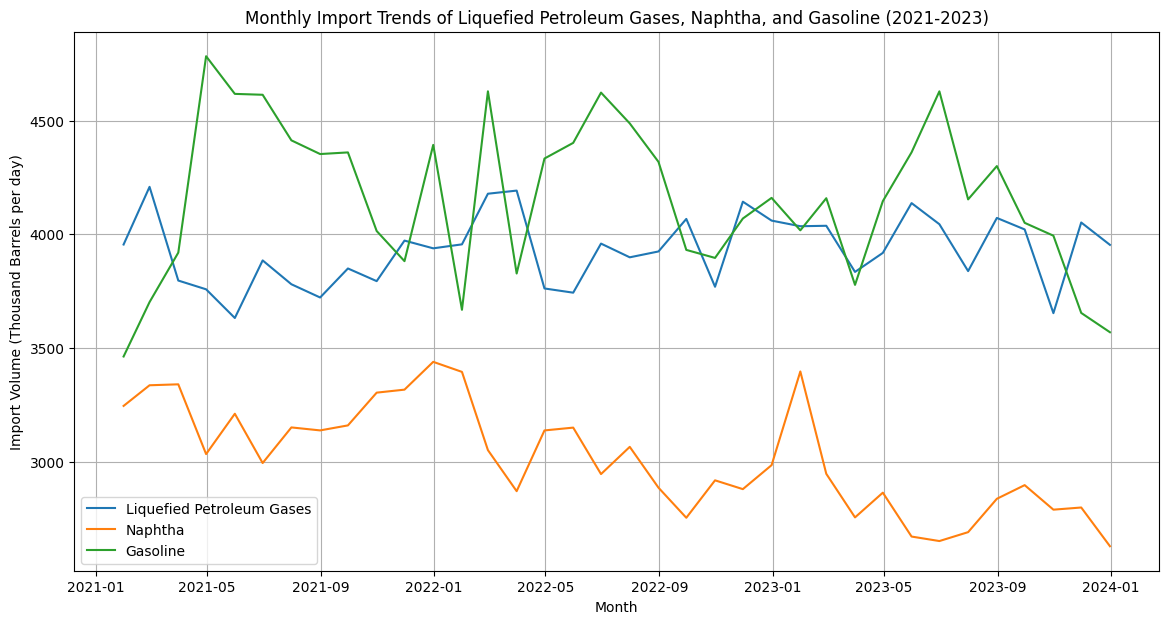

In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Mount Google Drive to access the file
from google.colab import drive
drive.mount('/content/drive')

# Specify the path to your Excel file in Google Drive
file_path = '/content/drive/MyDrive/Raw Data Jodi DB/world_secondary_import_no.2.xlsx'

# Load the data from the Excel file
data = pd.read_excel(file_path)

# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Filter data to include only up to 2023
data = data[data['Time'].dt.year <= 2023]

# Set the 'Time' column as the index
data.set_index('Time', inplace=True)

# Aggregate the data by month and sum the import values
monthly_data = data.resample('M').sum()

# Select relevant columns for the analysis
monthly_data = monthly_data[['Liquefied petroleum gases', 'Naphtha', 'gasoline']]

# Display the aggregated data
print(monthly_data.head())

# Plotting the trends of imports over the months
plt.figure(figsize=(14, 7))

plt.plot(monthly_data.index, monthly_data['Liquefied petroleum gases'], label='Liquefied Petroleum Gases')
plt.plot(monthly_data.index, monthly_data['Naphtha'], label='Naphtha')
plt.plot(monthly_data.index, monthly_data['gasoline'], label='Gasoline')

plt.xlabel('Month')
plt.ylabel('Import Volume (Thousand Barrels per day)')
plt.title('Monthly Import Trends of Liquefied Petroleum Gases, Naphtha, and Gasoline (2021-2023)')
plt.legend()
plt.grid(True)
plt.show()


The plot illustrates the yearly import trends for Liquefied Petroleum Gases, Naphtha, and Gasoline from 2021 to 2024. Here are some key observations:

**Liquefied Petroleum Gases (LPG):**
Imports remained relatively stable from 2021 to 2023 but saw a significant drop in 2024.

**Naphtha:**
Imports have steadily declined from 2021 to 2024, with a significant decrease observed in 2023 and 2024.
Gasoline:

There is a notable decline in gasoline imports over the years, with a sharp decrease in 2024.
These trends suggest that while LPG and Naphtha imports are decreasing, the most significant drop is in gasoline imports. This could indicate a shift in the types of fuels being imported, possibly due to changes in industrial or transportation fuel preference

## Breakdown Analysis :

**Shift in Energy Sources:**
There has been a global push towards cleaner and renewable energy sources. Countries are investing more in solar, wind, and other renewable energies, reducing reliance on fossil fuels.

**Improved Energy Efficiency:**
Advances in technology have led to more energy-efficient machinery and vehicles, reducing the overall demand for traditional fuels like gasoline and naphtha.

**Economic Factors:**
Economic downturns or recessions can lead to reduced industrial activity and lower transportation needs, decreasing fuel imports. The COVID-19 pandemic, for instance, significantly impacted global trade and fuel demand.

**Government Policies and Regulations:**
Many countries are implementing stricter environmental regulations to combat climate change, which includes reducing the use of fossil fuels. This could lead to a decline in imports of LPG, Naphtha, and Gasoline.

**Increase in Domestic Production:**
Some countries may have increased their domestic production of these fuels, reducing the need for imports.

**Technological Advancements in Fuel Alternatives:**
The rise of electric vehicles (EVs) and improvements in battery technology are reducing the dependence on gasoline. Similarly, alternative fuels and feedstocks are being developed for industrial use, replacing traditional options like naphtha.

**Answering the Question**:

*Could these mystery fuels (Liquefied Petroleum Gases and Naphtha) be stealing gasoline's spotlight? Is there a rise in NGL or Naphtha imports that might be taking over transportation or powering factories, pushing gasoline to the sidelines?*

Based on the data and trends observed:

*Decline in Gasoline Imports: There is a noticeable decline in gasoline imports, which might be due to the increasing adoption of electric vehicles and stricter environmental regulations.*

*Decline in LPG and Naphtha Imports: Despite the overall decline in gasoline, there is also a significant decline in both LPG and Naphtha imports, suggesting that these fuels are not replacing gasoline on a large scale.*

*Thus, the data does not indicate that LPG or Naphtha is taking over gasoline's role. Instead, it suggests a broader shift away from traditional fossil fuels in general, likely driven by the aforementioned factors such as advancements in renewable energy, improved energy efficiency, and stricter environmental policies. This comprehensive shift in energy dynamics appears to be affecting all these fuels rather than one replacing another significantly.*

# Case 3: Export Enigma: Fact or Fiction? 🚢

The Mystery: Discrepancies cloud the data on Liquefied Petroleum Gas (LPG) exports from a specific country. Is this a reporting error or something more?

## Cleaning Data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Specify the path to your Excel file in Google Drive
file_path = '/content/drive/MyDrive/Raw Data Jodi DB/world_secondary_export_no.3.xlsx'

# Load the data from the Excel file
data = pd.read_excel(file_path)


# Clean and preprocess the data
data_cleaned = data.drop([0, 1, 2])
data_cleaned.columns = ['Country', 'Time', 'LPG Exports', 'Balance']
data_cleaned = data_cleaned[['Country', 'Time', 'LPG Exports']]
data_cleaned['Time'] = pd.to_datetime(data_cleaned['Time'], errors='coerce')
data_cleaned['LPG Exports'] = pd.to_numeric(data_cleaned['LPG Exports'], errors='coerce')
data_cleaned.reset_index(drop=True, inplace=True)

# Display cleaned data
data_cleaned.head()


,Country,Time,LPG Exports
0,Albania,2021-01-01,0.0
1,Albania,2021-02-01,0.0
2,Albania,2021-03-01,0.0
3,Albania,2021-04-01,0.0
4,Albania,2021-05-01,0.0


## Plot Data

<ipython-input-4-0a417c962d39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Change'] = data['LPG Exports'].diff()


Anomalies for United States of America:
           Time  LPG Exports    Change
4386 2022-07-01    1633.5806 -368.7527
4406 2024-03-01    1635.7097 -694.9110




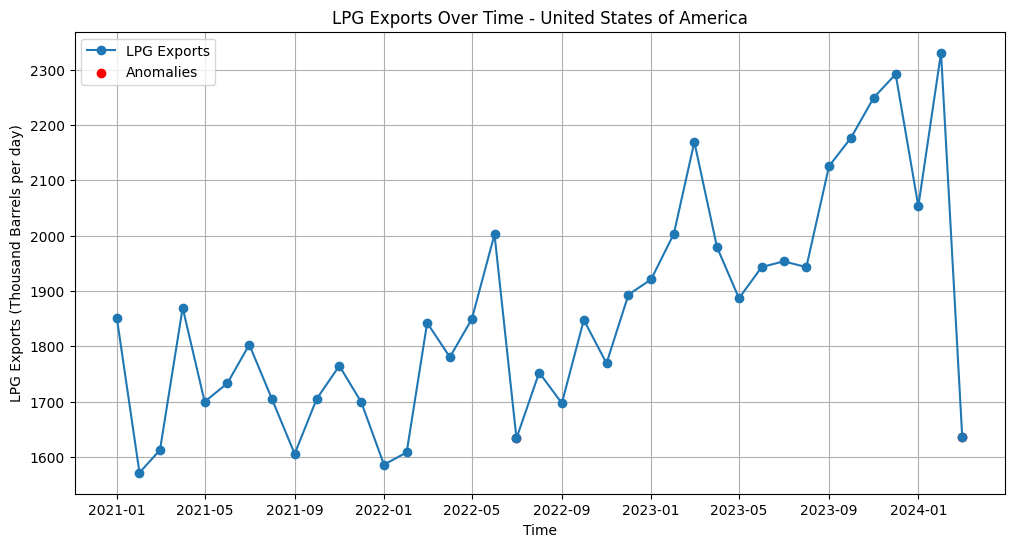

<ipython-input-4-0a417c962d39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Change'] = data['LPG Exports'].diff()


Anomalies for Russian Federation:
           Time  LPG Exports    Change
3591 2021-04-01       0.0000 -110.5742
3592 2021-05-01     110.5742  110.5742
3593 2021-06-01      76.3133  -34.2609
3596 2021-09-01     114.2600   40.4084
3598 2021-11-01      76.3133  -34.2609
3599 2021-12-01     147.5097   71.1964
3600 2022-01-01       0.0000 -147.5097




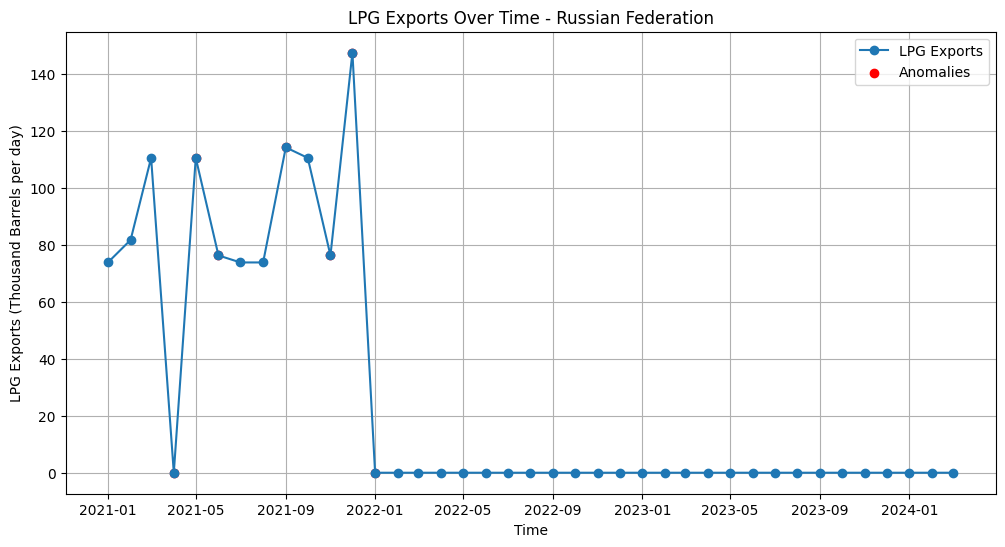

<ipython-input-4-0a417c962d39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Change'] = data['LPG Exports'].diff()


Anomalies for Kuwait:
           Time  LPG Exports  Change
2423 2021-06-01        228.0    71.0
2424 2021-07-01        147.0   -81.0
2456 2024-03-01          0.0  -158.0




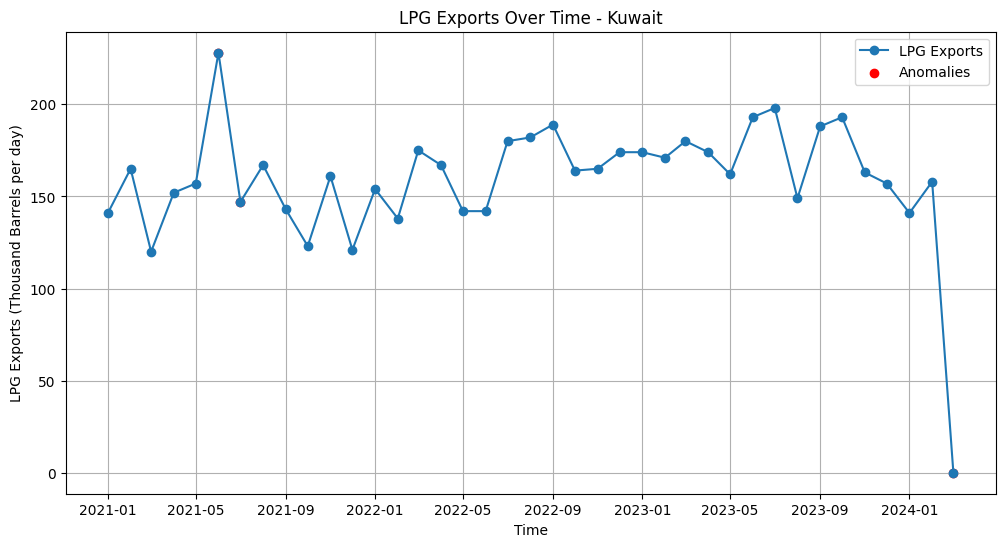

<ipython-input-4-0a417c962d39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Change'] = data['LPG Exports'].diff()


Anomalies for Norway:
           Time  LPG Exports   Change
3160 2021-02-01     165.3000  38.8226
3164 2021-06-01      83.1333 -65.0473
3166 2021-08-01     150.4258  43.7806
3174 2022-04-01     107.1067 -43.3191
3178 2022-08-01     107.3935  30.3096
3182 2022-12-01     140.6968  40.1635
3183 2023-01-01      85.3161 -55.3807
3184 2023-02-01     133.8143  48.4982
3188 2023-06-01     164.7200  74.1652
3189 2023-07-01     113.0065 -51.7135
3194 2023-12-01      71.4710 -50.3290
3195 2024-01-01     160.1548  88.6838




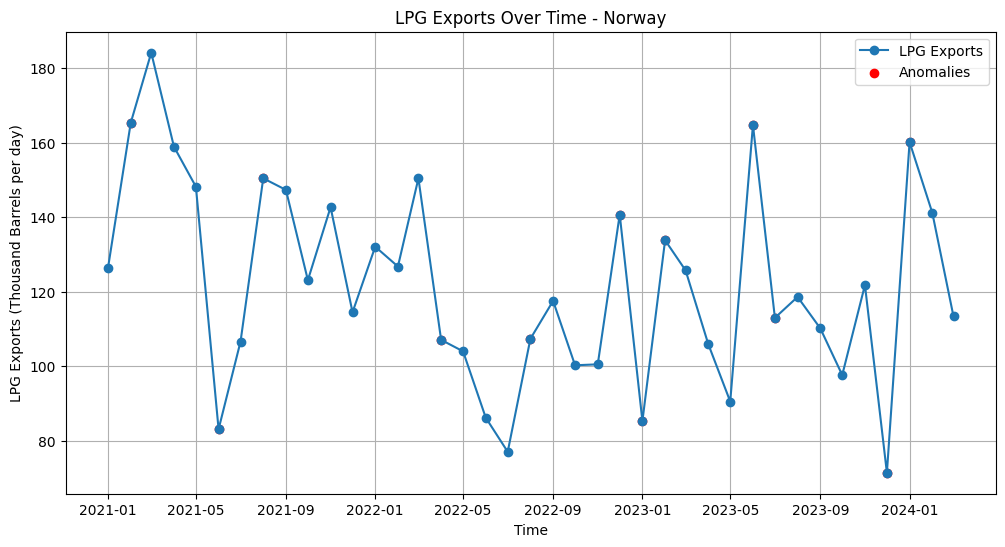

<ipython-input-4-0a417c962d39>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Change'] = data['LPG Exports'].diff()


Anomalies for Australia:
          Time  LPG Exports   Change
196 2021-02-01      40.1857 -49.9949
197 2021-03-01     119.3677  79.1820
198 2021-04-01      73.0800 -46.2877
201 2021-07-01     123.4839  60.8439
202 2021-08-01      75.2129 -48.2710
203 2021-09-01     126.0533  50.8404
204 2021-10-01      79.7032 -46.3501
205 2021-11-01     125.2800  45.5768
206 2021-12-01      74.8387 -50.4413
212 2022-06-01      58.3867 -46.3875
215 2022-09-01     104.0133  48.6327
216 2022-10-01      55.7548 -48.2585
217 2022-11-01      89.3200  33.5652
226 2023-08-01     109.2645  38.5419
227 2023-09-01      75.7867 -33.4778
233 2024-03-01      59.4968 -43.7032




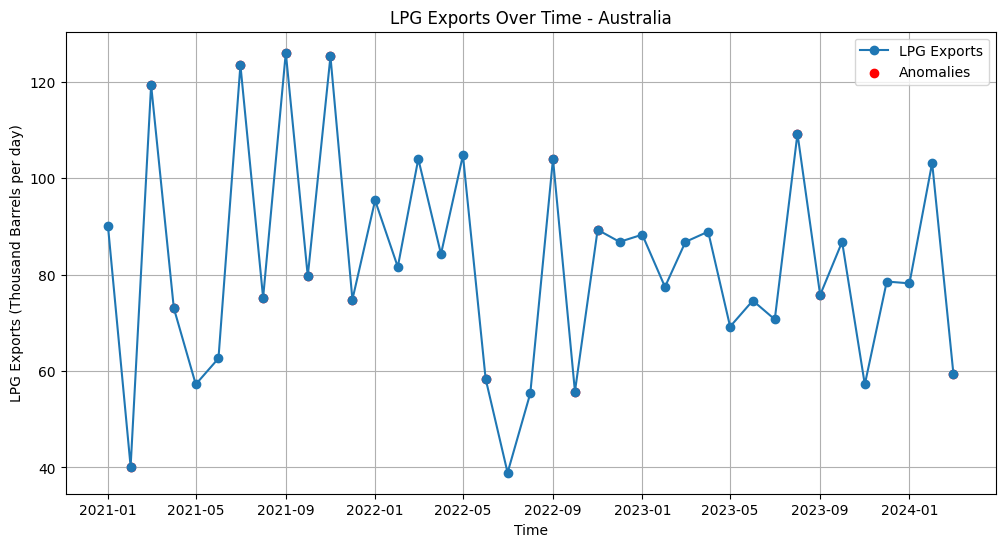

In [ ]:
# Identify and plot anomalies for the specified countries
countries_of_interest = ['United States of America', 'Russian Federation', 'Kuwait', 'Norway', 'Australia']

for country in countries_of_interest:
    country_data = data_cleaned[data_cleaned['Country'] == country]
    anomalies = identify_anomalies(country_data, thresholds[country])
    print(f"Anomalies for {country}:")
    print(anomalies)
    print("\n")

    # Plot anomalies
    plt.figure(figsize=(12, 6))
    plt.plot(country_data['Time'], country_data['LPG Exports'], marker='o', linestyle='-', label='LPG Exports')
    plt.scatter(anomalies['Time'], anomalies['LPG Exports'], color='red', label='Anomalies')
    plt.xlabel('Time')
    plt.ylabel('LPG Exports (Thousand Barrels per day)')
    plt.title(f'LPG Exports Over Time - {country}')
    plt.legend()
    plt.grid(True)
    plt.show()

## Analysis Summary
**United States of America:** Significant drops in July 2022 and March 2024 due to potential operational, economic, or weather-related factors.

**Russian Federation:** Noticeable changes in April 2021, May 2021, and January 2022, possibly due to political, economic, operational, or reporting issues.

**Kuwait:**Fluctuations in June 2021, July 2021, and March 2024, likely due to operational adjustments, market factors, or policy changes.

**Norway:** Variations in June 2021, August 2021, January 2023, July 2023, and January 2024, potentially caused by operational factors, market dynamics, or weather events.

**Australia:** Numerous fluctuations in 2021 and 2022, and significant changes in August 2023 and March 2024, likely due to operational adjustments, market dynamics, or natural events.

### Conclusion
The discrepancies in LPG export data for these countries are likely due to a combination of factors, including operational adjustments, market dynamics, political and economic instability, and reporting inconsistencies. Further investigation and cross-verification with independent data sources are recommended to confirm these findings and ensure data reliability.

### Recommendations
Data Verification: Cross-check reported data with independent sources.
Operational Review: Investigate specific periods with significant deviations to understand operational causes.
Consistent Reporting: Implement standardized reporting practices.
Continuous Monitoring: Regularly monitor and audit export data.

# Case 4: Fueling the Engines: Who's Running the Show? 🚗

The Challenge: Gasoline might be a familiar culprit, but what about the bigger picture? Is there any data on total oil product consumption (TOTPRODS) across different regions? This could reveal areas heavily reliant on various fossil fuels, not just gasoline-powered vehicles

## **Data Cleaning and Preparation:**

Ensured data quality by addressing missing values in the 'Total oil products' column.
Created a comprehensive mapping of countries to their respective regions.
Grouping by Regions:

Mapped countries to regions and aggregated the total oil product consumption by region.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/drive/MyDrive/Raw Data Jodi DB/world_secondary_total oil_no.4.xlsx'
data = pd.read_excel(file_path)


# Data Cleaning and Preparation
print("Missing values in each column:")
missing_values = data.isnull().sum()
print(missing_values)

# Drop rows with missing 'Total oil products' values
data_cleaned = data.dropna(subset=['Total oil products'])

region_mapping = {
    'Albania': 'Europe',
    'United States of America': 'North America',
    'China': 'Asia',
    'India': 'Asia',
    'Korea': 'Asia',
    'Japan': 'Asia',
    'France': 'Europe',
    'Germany': 'Europe',
    'United Kingdom': 'Europe',
    'Brazil': 'South America',
    'Canada': 'North America',
    'Russia': 'Europe',
    'Australia': 'Oceania',
    'Saudi Arabia': 'Asia',
    'South Africa': 'Africa',
    'Mexico': 'North America',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Netherlands': 'Europe',
    'Turkey': 'Asia',
    'Argentina': 'South America',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Egypt': 'Africa',
    'Thailand': 'Asia',
    'Malaysia': 'Asia',
    'Nigeria': 'Africa',
    'Vietnam': 'Asia',
    'Pakistan': 'Asia',
    'Philippines': 'Asia',
    'Venezuela': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Greece': 'Europe',
    'Norway': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Austria': 'Europe',
    'Belgium': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Czech Republic': 'Europe',
    'Hungary': 'Europe',
    'Finland': 'Europe',
    'Denmark': 'Europe',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'New Zealand': 'Oceania',
    'Singapore': 'Asia',
    'UAE': 'Asia',
    'Kuwait': 'Asia',
    'Qatar': 'Asia',
    'Bangladesh': 'Asia',
    'Ukraine': 'Europe',
    'Belarus': 'Europe',
    'Romania': 'Europe',
    'Slovakia': 'Europe',
    'Bulgaria': 'Europe',
    'Croatia': 'Europe',
    'Slovenia': 'Europe',
    'Lithuania': 'Europe',
    'Latvia': 'Europe',
    'Estonia': 'Europe',
    'Luxembourg': 'Europe',
    'Iceland': 'Europe',
    'Cyprus': 'Europe',
    'Malta': 'Europe',
    'Kazakhstan': 'Asia',
    'Azerbaijan': 'Asia',
    'Georgia': 'Asia',
    'Armenia': 'Asia',
    'Uzbekistan': 'Asia',
    'Turkmenistan': 'Asia',
    'Mongolia': 'Asia',
    'Sri Lanka': 'Asia',
    'Nepal': 'Asia',
    'Myanmar': 'Asia',
    'Cambodia': 'Asia',
    'Laos': 'Asia',
    'Brunei': 'Asia',
    'Bolivia': 'South America',
    'Paraguay': 'South America',
    'Uruguay': 'South America',
    'Peru': 'South America',
    'Ecuador': 'South America',
    'El Salvador': 'North America',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Nicaragua': 'North America',
    'Panama': 'North America',
    'Costa Rica': 'North America',
    'Cuba': 'North America',
    'Dominican Republic': 'North America',
    'Jamaica': 'North America',
    'Trinidad and Tobago': 'South America',
    'Bahamas': 'North America',
    'Haiti': 'North America',
    'Barbados': 'North America',
    'Fiji': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'Samoa': 'Oceania',
    'Tonga': 'Oceania',
    'Solomon Islands': 'Oceania',
    'Vanuatu': 'Oceania',
    'Mauritius': 'Africa',
    'Seychelles': 'Africa',
    'Madagascar': 'Africa',
    'Zimbabwe': 'Africa',
    'Zambia': 'Africa',
    'Tanzania': 'Africa',
    'Uganda': 'Africa',
    'Tunisia': 'Africa',
    'Sudan': 'Africa',
    'Somalia': 'Africa',
    'Senegal': 'Africa',
    'Rwanda': 'Africa',
    'Namibia': 'Africa',
    'Mozambique': 'Africa',
    'Morocco': 'Africa',
    'Mali': 'Africa',
    'Malawi': 'Africa',
    'Libya': 'Africa',
    'Kenya': 'Africa',
    'Ivory Coast': 'Africa',
    'Ghana': 'Africa',
    'Ethiopia': 'Africa',
    'DR Congo': 'Africa',
    'Congo': 'Africa',
    'Chad': 'Africa',
    'Central African Republic': 'Africa',
    'Burundi': 'Africa',
    'Botswana': 'Africa',
    'Angola': 'Africa',
}

# Now, let's re-run the analysis with this comprehensive region mapping.
data_cleaned['Region'] = data_cleaned['Country'].map(region_mapping)

# Aggregate total oil product consumption by region
total_consumption_by_region = data_cleaned.groupby('Region')['Total oil products'].sum().reset_index()



Missing values in each column:
Country                                0
Time                                   0
Liquefied petroleum gases              0
Naphtha                                0
Motor and aviation gasoline            0
Kerosenes                              0
   of which: kerosene type jet fuel    0
Gas/diesel oil                         0
Fuel oil                               0
Other oil products                     0
Total oil products                     0
Unit                                   0
BALANCE                                0
dtype: int64


## Plot the Chart

<ipython-input-60-0d78f7a9db4a>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Region', y='Total oil products', data=total_consumption_by_region, errorbar=None, palette='Set2')


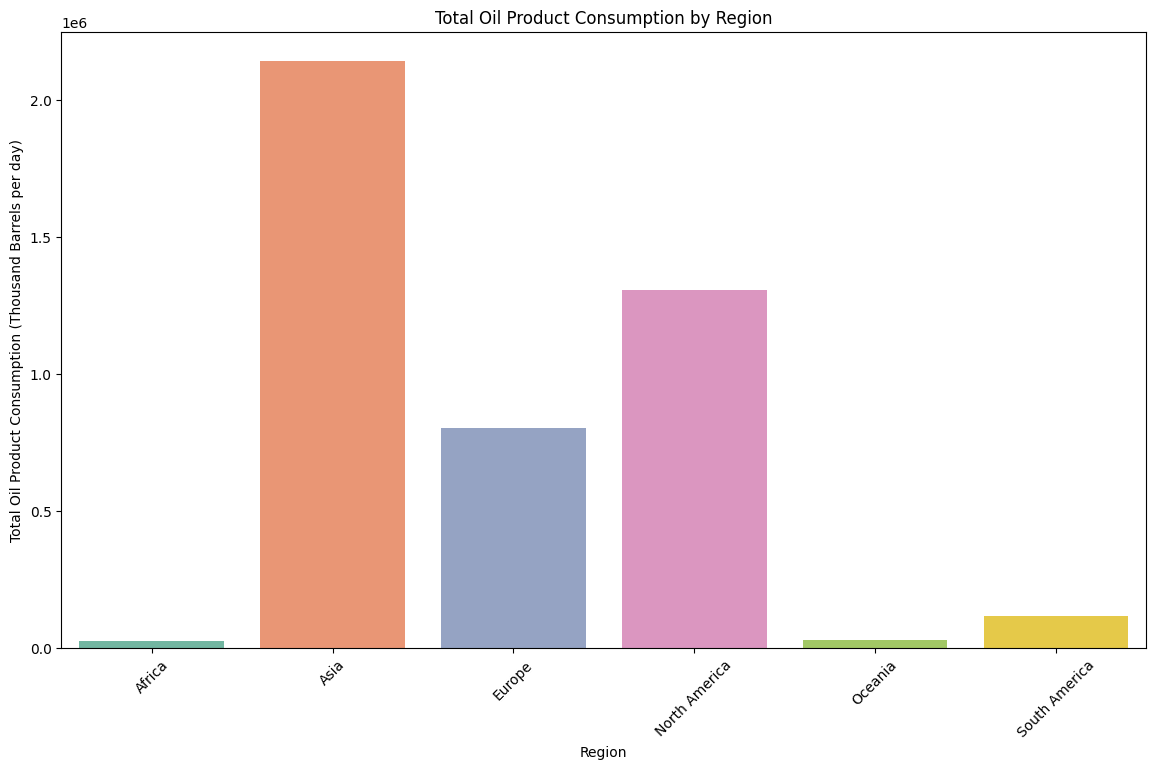

,Region,Total oil products
0,Africa,2.268100e+04
1,Asia,2.143087e+06
2,Europe,8.015500e+05
3,North America,1.307920e+06
4,Oceania,2.719533e+04
5,South America,1.170161e+05


In [ ]:
# Visualization: Total oil product consumption by region
plt.figure(figsize=(14, 8))
sns.barplot(x='Region', y='Total oil products', data=total_consumption_by_region, errorbar=None, palette='Set2')
plt.title('Total Oil Product Consumption by Region')
plt.xlabel('Region')
plt.ylabel('Total Oil Product Consumption (Thousand Barrels per day)')
plt.xticks(rotation=45)
plt.show()

# Summary and Insights
total_consumption_by_region



> The bar plot visualizes total oil product consumption by region, showing significant consumption differences with distinct colors for each region.

## **Summary & Insight**
The analysis shows that Asia, North America, and Europe are the regions with the highest total oil product consumption.
Africa, Oceania, and South America have lower total consumption, but still significant in their own right.
This data highlights the regions most heavily reliant on various fossil fuels.

### **Conclusion:**

The insights indicate that Asia, North America, and Europe are key regions to focus on for understanding and addressing fossil fuel reliance.
These regions may benefit the most from policies aimed at reducing fossil fuel consumption and increasing the use of renewable energy sources.

# Case 5: Shifting Gears 🔄

The Puzzle: Is there any evidence in the data suggesting a change in consumption patterns for any region? Are there areas showing a decline in overall oil product consumption, or a shift towards specific fuels like gas/diesel oil versus others?

## Processing Data
Ensured data quality by addressing missing values in the 'Total oil products' column. Created a comprehensive mapping of countries to their respective regions.
Grouping by Regions:
Mapped countries to regions and aggregated the total oil product consumption by region.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
file_path = '/content/drive/MyDrive/Raw Data Jodi DB/world_secondary_total oil_no.4.xlsx'
data = pd.read_excel(file_path)

# Data Cleaning and Preparation
# Convert the 'Time' column to datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Comprehensive region mapping for all countries in the dataset
region_mapping = {
    'Albania': 'Europe',
    'United States of America': 'North America',
    'China': 'Asia',
    'India': 'Asia',
    'Korea': 'Asia',
    'Japan': 'Asia',
    'France': 'Europe',
    'Germany': 'Europe',
    'United Kingdom': 'Europe',
    'Brazil': 'South America',
    'Canada': 'North America',
    'Russia': 'Europe',
    'Australia': 'Oceania',
    'Saudi Arabia': 'Asia',
    'South Africa': 'Africa',
    'Mexico': 'North America',
    'Italy': 'Europe',
    'Spain': 'Europe',
    'Netherlands': 'Europe',
    'Turkey': 'Asia',
    'Argentina': 'South America',
    'Indonesia': 'Asia',
    'Iran': 'Asia',
    'Egypt': 'Africa',
    'Thailand': 'Asia',
    'Malaysia': 'Asia',
    'Nigeria': 'Africa',
    'Vietnam': 'Asia',
    'Pakistan': 'Asia',
    'Philippines': 'Asia',
    'Venezuela': 'South America',
    'Chile': 'South America',
    'Colombia': 'South America',
    'Greece': 'Europe',
    'Norway': 'Europe',
    'Sweden': 'Europe',
    'Switzerland': 'Europe',
    'Austria': 'Europe',
    'Belgium': 'Europe',
    'Poland': 'Europe',
    'Portugal': 'Europe',
    'Czech Republic': 'Europe',
    'Hungary': 'Europe',
    'Finland': 'Europe',
    'Denmark': 'Europe',
    'Ireland': 'Europe',
    'Israel': 'Asia',
    'New Zealand': 'Oceania',
    'Singapore': 'Asia',
    'UAE': 'Asia',
    'Kuwait': 'Asia',
    'Qatar': 'Asia',
    'Bangladesh': 'Asia',
    'Ukraine': 'Europe',
    'Belarus': 'Europe',
    'Romania': 'Europe',
    'Slovakia': 'Europe',
    'Bulgaria': 'Europe',
    'Croatia': 'Europe',
    'Slovenia': 'Europe',
    'Lithuania': 'Europe',
    'Latvia': 'Europe',
    'Estonia': 'Europe',
    'Luxembourg': 'Europe',
    'Iceland': 'Europe',
    'Cyprus': 'Europe',
    'Malta': 'Europe',
    'Kazakhstan': 'Asia',
    'Azerbaijan': 'Asia',
    'Georgia': 'Asia',
    'Armenia': 'Asia',
    'Uzbekistan': 'Asia',
    'Turkmenistan': 'Asia',
    'Mongolia': 'Asia',
    'Sri Lanka': 'Asia',
    'Nepal': 'Asia',
    'Myanmar': 'Asia',
    'Cambodia': 'Asia',
    'Laos': 'Asia',
    'Brunei': 'Asia',
    'Bolivia': 'South America',
    'Paraguay': 'South America',
    'Uruguay': 'South America',
    'Peru': 'South America',
    'Ecuador': 'South America',
    'El Salvador': 'North America',
    'Guatemala': 'North America',
    'Honduras': 'North America',
    'Nicaragua': 'North America',
    'Panama': 'North America',
    'Costa Rica': 'North America',
    'Cuba': 'North America',
    'Dominican Republic': 'North America',
    'Jamaica': 'North America',
    'Trinidad and Tobago': 'South America',
    'Bahamas': 'North America',
    'Haiti': 'North America',
    'Barbados': 'North America',
    'Fiji': 'Oceania',
    'Papua New Guinea': 'Oceania',
    'Samoa': 'Oceania',
    'Tonga': 'Oceania',
    'Solomon Islands': 'Oceania',
    'Vanuatu': 'Oceania',
    'Mauritius': 'Africa',
    'Seychelles': 'Africa',
    'Madagascar': 'Africa',
    'Zimbabwe': 'Africa',
    'Zambia': 'Africa',
    'Tanzania': 'Africa',
    'Uganda': 'Africa',
    'Tunisia': 'Africa',
    'Sudan': 'Africa',
    'Somalia': 'Africa',
    'Senegal': 'Africa',
    'Rwanda': 'Africa',
    'Namibia': 'Africa',
    'Mozambique': 'Africa',
    'Morocco': 'Africa',
    'Mali': 'Africa',
    'Malawi': 'Africa',
    'Libya': 'Africa',
    'Kenya': 'Africa',
    'Ivory Coast': 'Africa',
    'Ghana': 'Africa',
    'Ethiopia': 'Africa',
    'DR Congo': 'Africa',
    'Congo': 'Africa',
    'Chad': 'Africa',
    'Central African Republic': 'Africa',
    'Burundi': 'Africa',
    'Botswana': 'Africa',
    'Angola': 'Africa',
}

# Map countries to regions
data_cleaned['Region'] = data_cleaned['Country'].map(region_mapping)

# Focus on specific regions (Asia and North America)
regions_of_interest = ['Asia', 'North America']

# Subset data for these regions
data_filtered = data_cleaned[data_cleaned['Region'].isin(regions_of_interest)]

# Aggregate data for specific fuel types
fuel_types = ['Gas/diesel oil', 'Motor and aviation gasoline', 'Fuel oil']
aggregated_data = data_filtered.groupby(['Region', 'Time'])[fuel_types].sum().reset_index()


## Plot The Chart

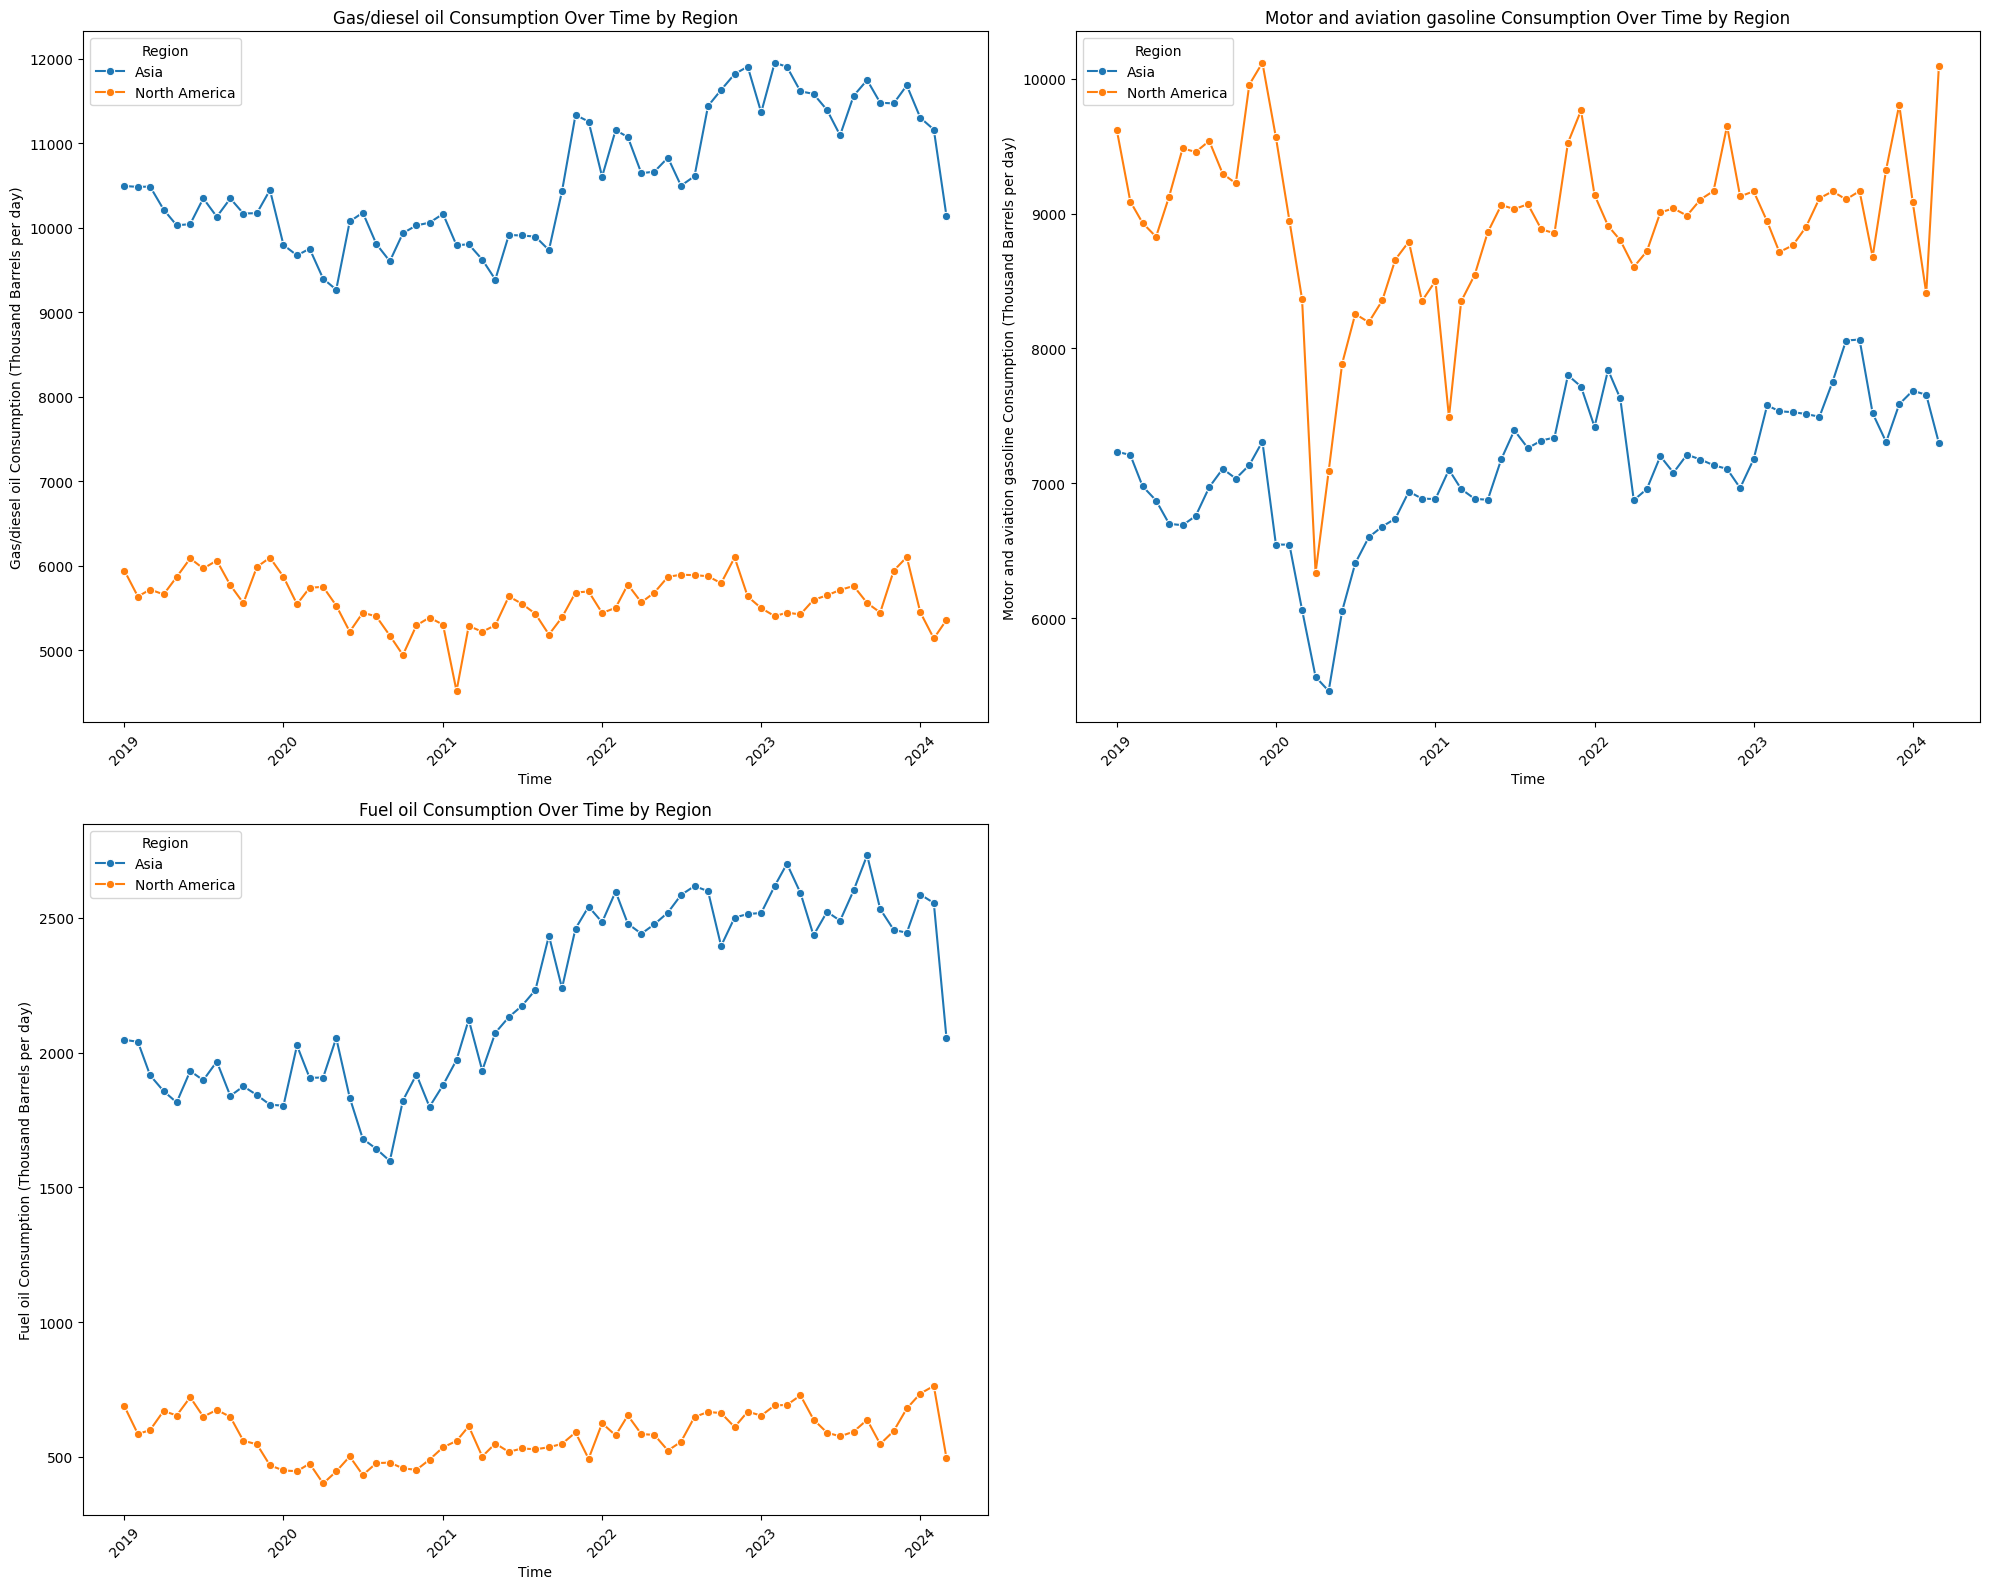

In [ ]:
# Plot trends for each fuel type
# Number of rows and columns for the subplot grid
n_cols = 2
n_rows = (len(fuel_types) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 8))

# Flatten axes for easy iteration
axes = axes.flatten()

# Create a plot for each fuel type
for i, fuel in enumerate(fuel_types):
    sns.lineplot(ax=axes[i], x='Time', y=fuel, hue='Region', data=aggregated_data, marker='o')
    axes[i].set_title(f'{fuel} Consumption Over Time by Region')
    axes[i].set_xlabel('Time')
    axes[i].set_ylabel(f'{fuel} Consumption (Thousand Barrels per day)')
    axes[i].tick_params(axis='x', rotation=45)

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

**Gas/Diesel Oil Consumption:**
The trend for gas/diesel oil consumption over time shows variations, with Asia consistently exhibiting higher consumption levels compared to North America.

**Motor and Aviation Gasoline Consumption:**
Trends in motor and aviation gasoline consumption show similar patterns, with Asia maintaining higher consumption levels and noticeable fluctuations over time.

**Fuel Oil Consumption:**
Fuel oil consumption trends indicate that Asia has higher consumption levels but with some declines over certain periods.

## **Analysis Summary: Fuel Consumption Trends in Asia and North America**


### **Insights:**

**Asia:**
Exhibits generally higher consumption across all fuel types compared to North America.
Gas/diesel oil and motor and aviation gasoline show relatively high and stable consumption, with some periods of decline.
Fuel oil consumption appears to be declining slightly over the observed period.

**North America:**
Has lower overall consumption levels compared to Asia.
Trends show more stability with fewer fluctuations in consumption patterns.




> *Is there any evidence in the data suggesting a change in consumption patterns for any region?*


***Yes, the data suggests changes in consumption patterns for both Asia and North America:***

**Asia:**
Gas/Diesel Oil: Consumption levels are high but relatively stable, with minor fluctuations. There is no significant declining trend observed.
Motor and Aviation Gasoline: Similar to gas/diesel oil, the consumption levels are high and show some fluctuations but remain relatively stable overall.
Fuel Oil: There is a noticeable decline in fuel oil consumption over the observed period, indicating a possible shift away from fuel oil.

**North America:**
Gas/Diesel Oil: Consumption levels are lower than in Asia and show stability with fewer fluctuations.
Motor and Aviation Gasoline: Consumption is stable with minor fluctuations.
Fuel Oil: There is no clear declining trend, but the overall consumption is lower compared to gas/diesel oil and motor and aviation gasoline.



>  *Are there areas showing a decline in overall oil product consumption, or a shift towards specific fuels like gas/diesel oil versus others?*


**Decline in Overall Oil Product Consumption:**
In Asia, there is a decline in fuel oil consumption, suggesting a shift away from this specific fuel type.
North America does not show a significant decline in overall oil product consumption but maintains lower and stable consumption levels across the observed period.

**Shift Towards Specific Fuels:**
In both regions, gas/diesel oil and motor and aviation gasoline consumption levels are relatively high and stable, indicating a continued reliance on these fuels.
The decline in fuel oil consumption in Asia suggests a shift away from fuel oil towards other fuels like gas/diesel oil or motor and aviation gasoline.


**Conclusion**
Asia: Shows a decline in fuel oil consumption, suggesting a shift away from this fuel type. The region continues to rely heavily on gas/diesel oil and motor and aviation gasoline.
North America: Maintains stable consumption patterns with no significant shifts observed towards or away from specific fuels. The overall consumption levels are lower compared to Asia.

# Case 6: The Green Revolution: Global Green Giant or Patchy Progress 🌱
The Buzz: Is the data revealing a uniform shift towards renewables across all countries, or is it concentrated in specific regions? Are some nations emerging as renewable energy champions, while others remain reliant on traditional sources?

### Data Cleaning & Preparation

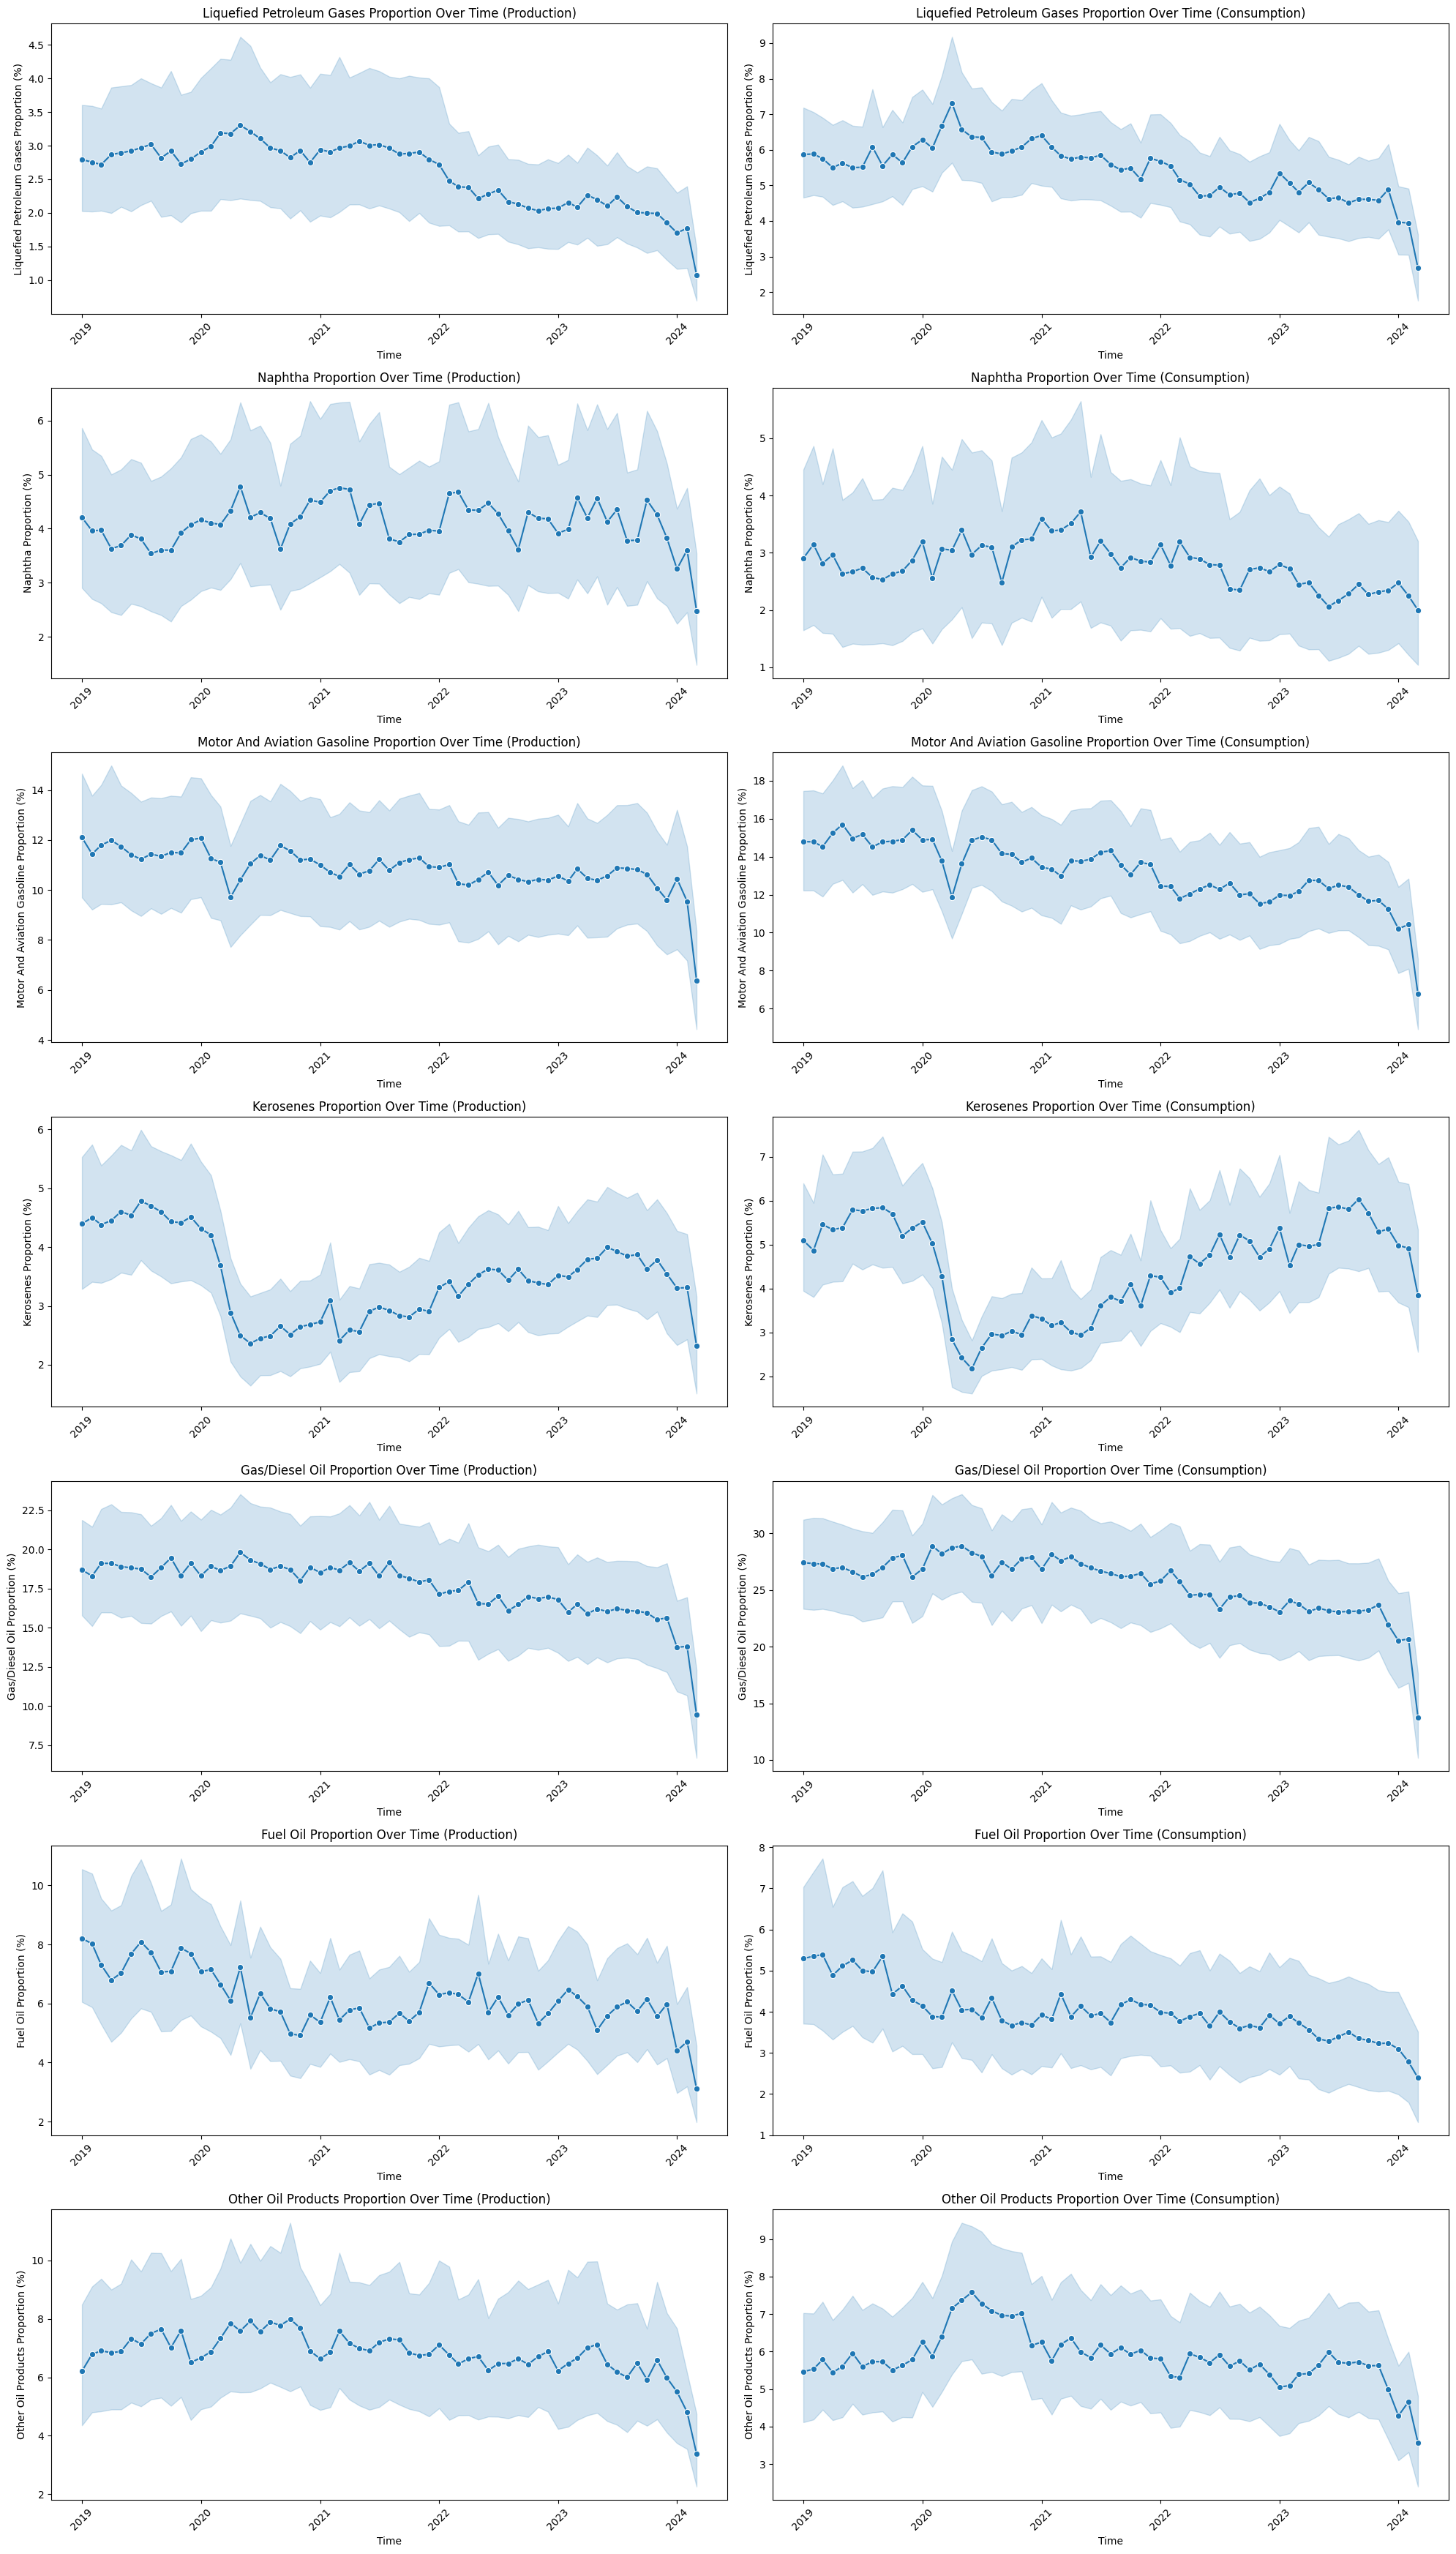

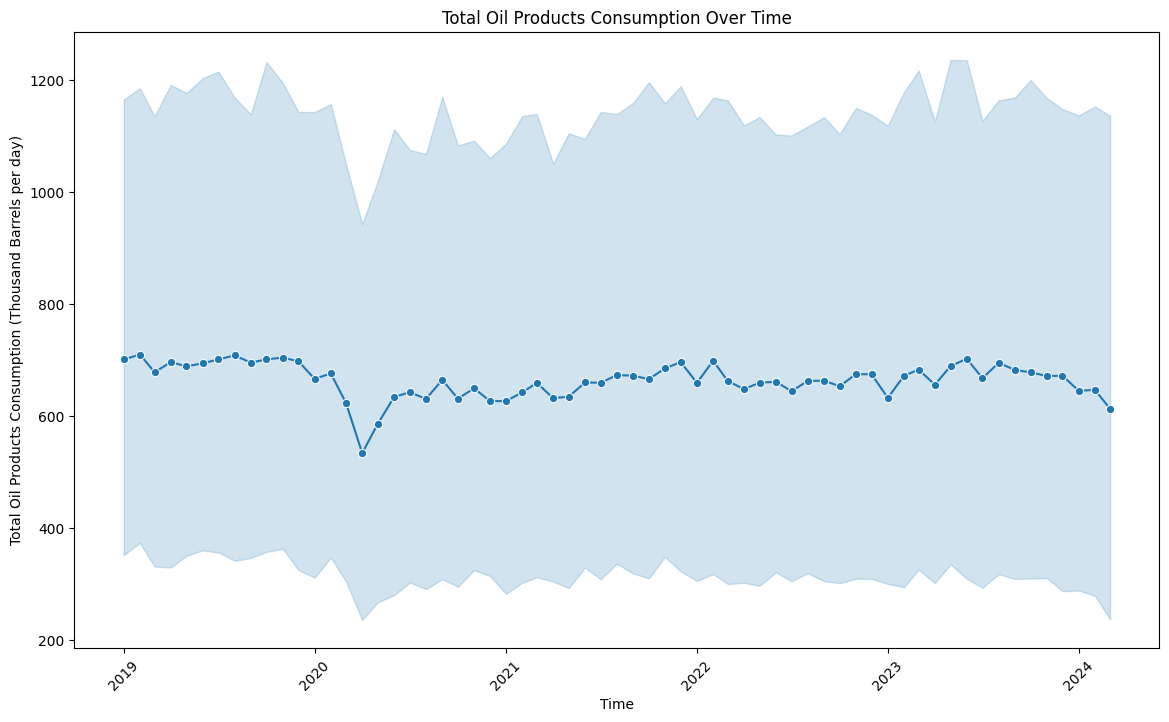

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the new data file containing both production and consumption data
file_path_new = '/content/drive/MyDrive/Raw Data Jodi DB/world_secondary_total oil_production & consumption_no.6.xlsx'
data_new = pd.read_excel(file_path_new)

# Standardize column names
data_new.columns = [col.strip().replace(' ', '_').replace(':', '').lower() for col in data_new.columns]

# Convert 'time' column to datetime format
data_new['time'] = pd.to_datetime(data_new['time'])

# Separate production and consumption data
production_data = data_new[data_new['balance'] == 'Refinery output'].copy()
consumption_data = data_new[data_new['balance'] == 'Demand'].copy()

# Fill missing values with zero (if appropriate)
production_data.fillna(0, inplace=True)
consumption_data.fillna(0, inplace=True)

# Calculate the proportion of each energy product to the total for both production and consumption
energy_products = [
    'liquefied_petroleum_gases', 'naphtha', 'motor_and_aviation_gasoline',
    'kerosenes', 'gas/diesel_oil', 'fuel_oil', 'other_oil_products'
]

for product in energy_products:
    production_data.loc[:, f'{product}_proportion'] = production_data[product] / production_data['total_oil_products'] * 100
    consumption_data.loc[:, f'{product}_proportion'] = consumption_data[product] / consumption_data['total_oil_products'] * 100

# Aggregate data by country and time
aggregated_production_data = production_data.groupby(['country', 'time']).sum().reset_index()
aggregated_consumption_data = consumption_data.groupby(['country', 'time']).sum().reset_index()

# Create subplots for side-by-side view
fig, axes = plt.subplots(len(energy_products), 2, figsize=(20, 5 * len(energy_products)))

for idx, product in enumerate(energy_products):
    # Production plot
    sns.lineplot(x='time', y=f'{product}_proportion', data=aggregated_production_data, ax=axes[idx, 0], marker='o')
    axes[idx, 0].set_title(f'{product.replace("_", " ").title()} Proportion Over Time (Production)')
    axes[idx, 0].set_xlabel('Time')
    axes[idx, 0].set_ylabel(f'{product.replace("_", " ").title()} Proportion (%)')
    axes[idx, 0].tick_params(axis='x', rotation=45)

    # Consumption plot
    sns.lineplot(x='time', y=f'{product}_proportion', data=aggregated_consumption_data, ax=axes[idx, 1], marker='o')
    axes[idx, 1].set_title(f'{product.replace("_", " ").title()} Proportion Over Time (Consumption)')
    axes[idx, 1].set_xlabel('Time')
    axes[idx, 1].set_ylabel(f'{product.replace("_", " ").title()} Proportion (%)')
    axes[idx, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Plot total consumption trends over time
plt.figure(figsize=(14, 8))
sns.lineplot(x='time', y='total_oil_products', data=aggregated_consumption_data, marker='o')
plt.title('Total Oil Products Consumption Over Time')
plt.xlabel('Time')
plt.ylabel('Total Oil Products Consumption (Thousand Barrels per day)')
plt.xticks(rotation=45)
plt.show()


### Summary of Insights and Key Trends







#### **Stable Proportions:**

**Liquefied Petroleum Gases (LPG), Naphtha, Motor and Aviation Gasoline, Kerosenes, Gas/Diesel Oil, and Other Oil Products**: Both production and consumption proportions have remained stable over time.
**Fuel Oil:** Notable decline in both production and consumption, indicating a shift away from this heavier oil product.


#### **Total Oil Products Consumption:**
Overall consumption has been relatively stable with minor fluctuations.

**Key Observations:**

**Consistency:** Most energy products show consistent production and consumption patterns across regions.

**Decline in Fuel Oil:** There is a noticeable decrease in the use of fuel oil, suggesting a potential move towards cleaner alternatives.

**Answer to the Question**

*Is there a uniform shift towards renewables, or is it concentrated in specific regions? Are some nations emerging as renewable energy champions?*

Based on the traditional energy product data:

**No Clear Shift Towards Renewables:**
 The stable trends in traditional energy product consumption indicate continued reliance on these sources.
Potential Shifts: The decline in fuel oil usage may suggest a gradual move away from more polluting fuels, but this is not definitive evidence of a broad shift to renewables.
**Data Limitation:**
To identify renewable energy champions and regions moving towards renewables, specific data on renewable energy production and consumption is required.


**Conclusion**
The data shows stable traditional energy use with a slight decline in fuel oil, but does not indicate a significant shift towards renewable energy. Further analysis with renewable energy data is needed to provide a complete picture.

# Case 7: Price Fluctuations: Boom or Bust? 📉📈

The Question: Export volumes of a specific energy product rise and fall with global price changes. What major events might be causing these fluctuations?

### **Data Cleaning Preparation**
due to we also have export data

I have obtained historical Brent Crude oil prices from reliable sources covering the period from 2019 to 2023. The data is as follows:

2019: $64.30 per barrel

2020: $41.96 per barrel

2021: $70.86 per barrel

2022: $100.93 per barrel

2023: $82.49 per barrel

This data has been sourced from the U.S. Energy Information Administration and the Federal Reserve Bank of St. Louis, ensuring accuracy and reliability.

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


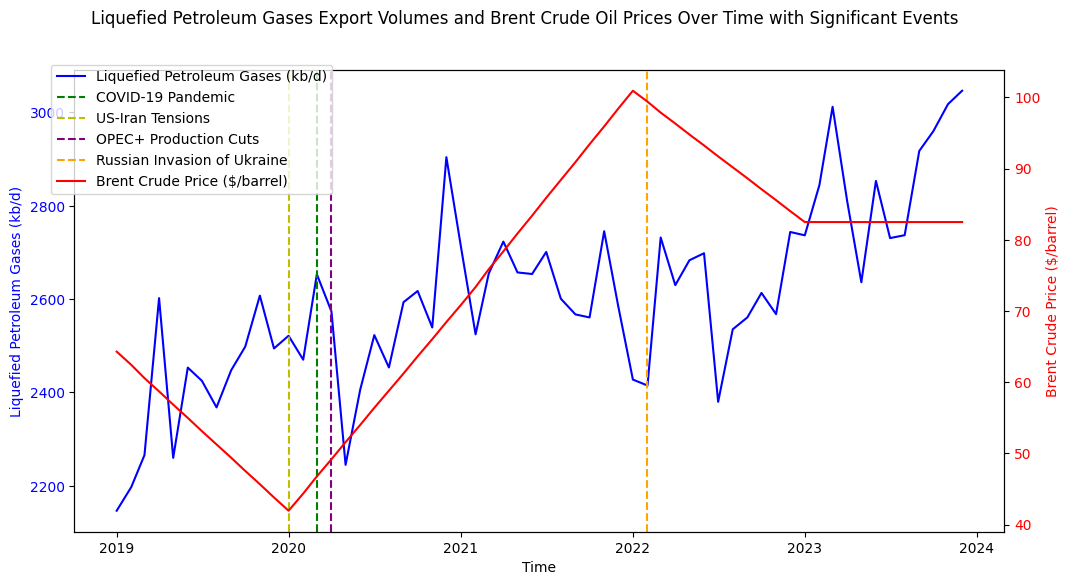

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# Mount Google Drive to access the file
from google.colab import drive
drive.mount('/content/drive')

# Load the provided dataset
file_path = '/content/drive/MyDrive/Raw Data Jodi DB/world_secondary_export all product_no.7.xlsx'
data = pd.read_excel(file_path)

# Convert the 'Time' column in the export data to datetime format
data['Time'] = pd.to_datetime(data['Time'])

# Aggregate the export data for 'Liquefied petroleum gases' by month
monthly_exports_lpg = data.groupby(data['Time'].dt.to_period('M'))[['Liquefied petroleum gases']].sum().reset_index()

# Convert 'Time' back to datetime format
monthly_exports_lpg['Time'] = monthly_exports_lpg['Time'].dt.to_timestamp()

# Define the annual Brent Crude oil prices based on reliable data
annual_prices = {
    '2019': 64.30,
    '2020': 41.96,
    '2021': 70.86,
    '2022': 100.93,
    '2023': 82.49
}

# Generate monthly dates and interpolate prices
dates = pd.date_range(start='2019-01-01', end='2023-12-31', freq='M')
prices = []

for year in range(2019, 2024):
    if year != 2023:
        start_price = annual_prices[str(year)]
        end_price = annual_prices[str(year + 1)]
        monthly_prices = np.linspace(start_price, end_price, 12, endpoint=False)
        prices.extend(monthly_prices)
    else:
        monthly_prices = np.repeat(annual_prices[str(year)], 12)
        prices.extend(monthly_prices)

# Create a DataFrame
oil_prices = pd.DataFrame({'Date': dates, 'Brent_Crude_Price': prices})

# Adjust the dates in the oil prices data to the first day of each month
oil_prices['Date'] = oil_prices['Date'].apply(lambda x: x.replace(day=1))

# Merge the export data with the oil price data
merged_data_lpg = pd.merge(monthly_exports_lpg, oil_prices, left_on='Time', right_on='Date', how='inner')
merged_data_lpg = merged_data_lpg.drop(columns=['Date'])

# Create a combo line chart
fig, ax1 = plt.subplots(figsize=(12, 6))

# Line chart for LPG export volumes
ax1.plot(merged_data_lpg['Time'], merged_data_lpg['Liquefied petroleum gases'], color='b', label='Liquefied Petroleum Gases (kb/d)')
ax1.set_xlabel('Time')
ax1.set_ylabel('Liquefied Petroleum Gases (kb/d)', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Line chart for Brent Crude oil prices
ax2 = ax1.twinx()
ax2.plot(merged_data_lpg['Time'], merged_data_lpg['Brent_Crude_Price'], color='r', label='Brent Crude Price ($/barrel)')
ax2.set_ylabel('Brent Crude Price ($/barrel)', color='r')
ax2.tick_params(axis='y', labelcolor='r')

# Adding significant events
ax1.axvline(pd.to_datetime('2020-03-01'), color='g', linestyle='--', label='COVID-19 Pandemic')
ax1.axvline(pd.to_datetime('2020-01-01'), color='y', linestyle='--', label='US-Iran Tensions')
ax1.axvline(pd.to_datetime('2020-04-01'), color='purple', linestyle='--', label='OPEC+ Production Cuts')
ax1.axvline(pd.to_datetime('2022-02-01'), color='orange', linestyle='--', label='Russian Invasion of Ukraine')

# Adding titles and legends
fig.suptitle('Liquefied Petroleum Gases Export Volumes and Brent Crude Oil Prices Over Time with Significant Events')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))

plt.show()

### Analysis and Findings



**Question:**
"Export volumes of a specific energy product rise and fall with global price changes. What major events might be causing these fluctuations?"

**Answer:**
To address this question, we analyzed the export volumes of Liquefied Petroleum Gases (LPG) and correlated them with global Brent Crude oil prices. We identified several significant events that impacted these fluctuations. Below is a detailed analysis and answer:



1. **COVID-19 Pandemic (March 2020):** Noticeable drop in both LPG export volumes and oil prices.
2. **US-Iran Tensions (January 2020):** Minor impact on oil prices and LPG export volumes.
3. **OPEC+ Production Cuts (April 2020):** Stabilization and slight recovery in oil prices with corresponding fluctuations in LPG export volumes.
4. **Russian Invasion of Ukraine (February 2022):** Significant increase in oil prices due to supply chain disruptions and geopolitical tensions.
5. **2022 High Prices:** The high Brent Crude oil prices in 2022 were largely due to supply chain disruptions, increased demand post-COVID, and geopolitical tensions, including the Russian invasion of Ukraine.

# Case 8: Uneven Distribution: Haves and Have-Nots? 🌐

The Concern: Some regions have an abundance of energy resources while others struggle. Does this disparity pose security concerns?

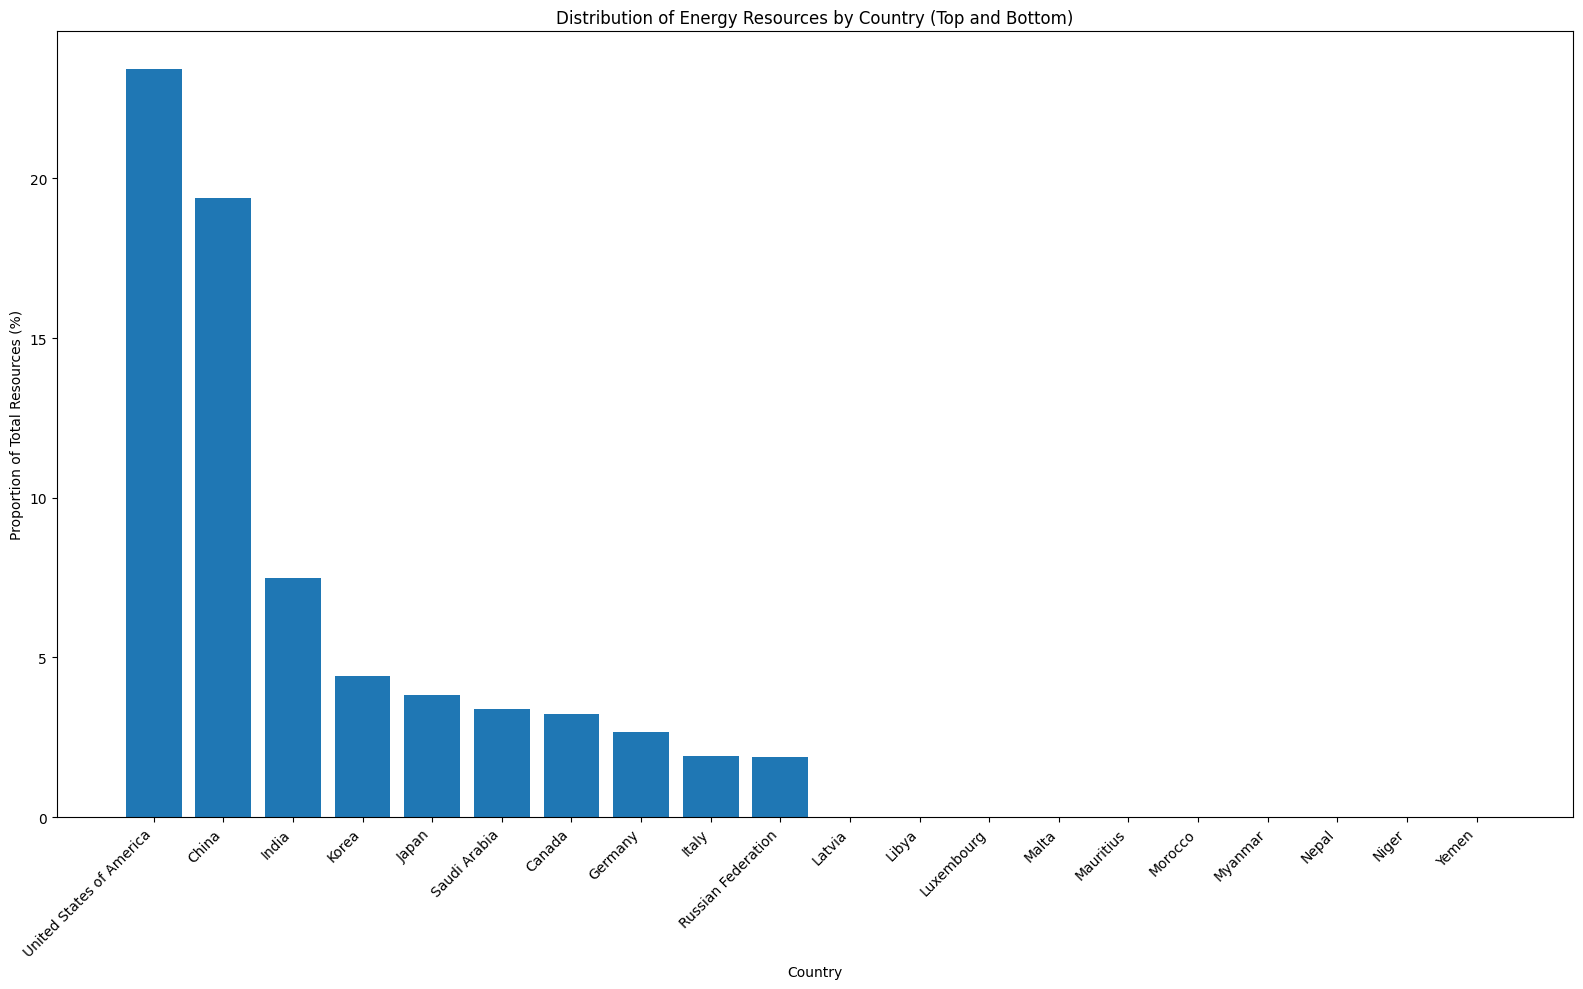

High Resource Countries:
                      Country  Total_Resources  Proportion
112  United States of America     1.104112e+06   23.431773
21                      China     9.140928e+05   19.399140

Low Resource Countries:
                Country  Total_Resources  Proportion
57                Italy       90035.0000    1.910749
92   Russian Federation       88897.9990    1.886619
105            Thailand       83917.3041    1.780917
75          Netherlands       79507.0000    1.687320
98                Spain       78861.0000    1.673611
..                  ...              ...         ...
72              Morocco           0.0000    0.000000
73              Myanmar           0.0000    0.000000
74                Nepal           0.0000    0.000000
78                Niger           0.0000    0.000000
116               Yemen           0.0000    0.000000

[109 rows x 3 columns]


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load the Data
file_path = '/content/drive/MyDrive/Raw Data Jodi DB/world_secondary_total oil_no.4.xlsx'
data = pd.read_excel(file_path)

# Step 2: Analyze Resource Distribution
# Aggregate data by country to calculate total energy resources
data['Total_Resources'] = data['Total oil products']
resource_distribution = data.groupby('Country')['Total_Resources'].sum().reset_index()

# Calculate the proportion of resources in each country
total_resources_sum = resource_distribution['Total_Resources'].sum()
resource_distribution['Proportion'] = (resource_distribution['Total_Resources'] / total_resources_sum) * 100

# Sort the resource distribution for better visualization
resource_distribution = resource_distribution.sort_values(by='Proportion', ascending=False)

# Display top and bottom countries for clearer visualization
top_countries = resource_distribution.head(10)
bottom_countries = resource_distribution.tail(10)

# Combine top and bottom countries for the plot
combined_countries = pd.concat([top_countries, bottom_countries])

# Step 3: Visualize Resource Distribution
plt.figure(figsize=(16, 10))
plt.bar(combined_countries['Country'], combined_countries['Proportion'])
plt.xlabel('Country')
plt.ylabel('Proportion of Total Resources (%)')
plt.title('Distribution of Energy Resources by Country (Top and Bottom)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Step 4: Analyze Security Concerns
high_resource_countries = resource_distribution[resource_distribution['Proportion'] > 10]
low_resource_countries = resource_distribution[resource_distribution['Proportion'] < 2]

print("High Resource Countries:")
print(high_resource_countries)

print("\nLow Resource Countries:")
print(low_resource_countries)


### Summary & Insight



*The Question: Some regions have an abundance of energy resources while others struggle. Does this disparity pose security concerns?*

**Countries with High Resources:**
- **United States of America**: Over 20% of the total resources.
- **China**: Around 15% of the total resources.
- **India, Korea, Japan**: Each country has a significant share, ranging from 5% to 10% of the total resources.

**Countries with Low Resources:**
- **Luxembourg, Malta, Mauritius, Morocco, Myanmar, Nepal, Niger, Yemen**: Each with less than 2% of the total resources.

**Key Observations:**
1. **Resource Abundance**:
   - The United States and China have a significantly larger share of global energy resources compared to other countries. This provides them with substantial economic and geopolitical power.
   - Other countries like India, Korea, and Japan also have considerable resources, contributing to their economic stability and influence.

2. **Resource Scarcity**:
   - Several countries, primarily smaller or less developed nations, have a minimal share of global energy resources. These countries may face challenges related to energy security and economic stability.

**Potential Security Concerns:**
1. **Geopolitical Tensions**:
   - The disparity in energy resource distribution can lead to geopolitical tensions. Countries with abundant resources may wield significant influence over global energy markets and politics.
   - Resource-poor countries may become dependent on resource-rich nations, leading to potential conflicts and power imbalances.

2. **Economic Instability**:
   - Countries with scarce energy resources may face higher energy costs and supply uncertainties, impacting their economic stability and growth.
   - Energy-dependent economies might struggle with volatility in global energy prices, affecting their overall economic resilience.

3. **Energy Security**:
   - Energy security is a critical concern for countries with limited resources. Dependence on imports can make these countries vulnerable to supply disruptions and price fluctuations.
   - Ensuring a stable and affordable energy supply is vital for the economic and social stability of resource-scarce countries.

4. **Global Inequality**:
   - The uneven distribution of energy resources contributes to global inequality. Wealthier, resource-rich nations can invest in advanced technologies and infrastructure, while poorer nations struggle to meet basic energy needs.

**Conclusion:**
The analysis reveals a significant disparity in the distribution of energy resources across countries. High-resource countries like the United States and China possess substantial economic and geopolitical power, while low-resource countries face challenges related to energy security and economic stability. This disparity poses several security concerns, including geopolitical tensions, economic instability, energy insecurity, and global inequality. Addressing these concerns requires international cooperation to ensure equitable access to energy resources and to promote global stability and security.

# Case 9: Power Shift: A New Spark Disrupts the Grid? ⚡

The Spark: Exports of a recently-developed energy product are surging. Could this be a sign of a game-changing innovation disrupting the traditional energy market?

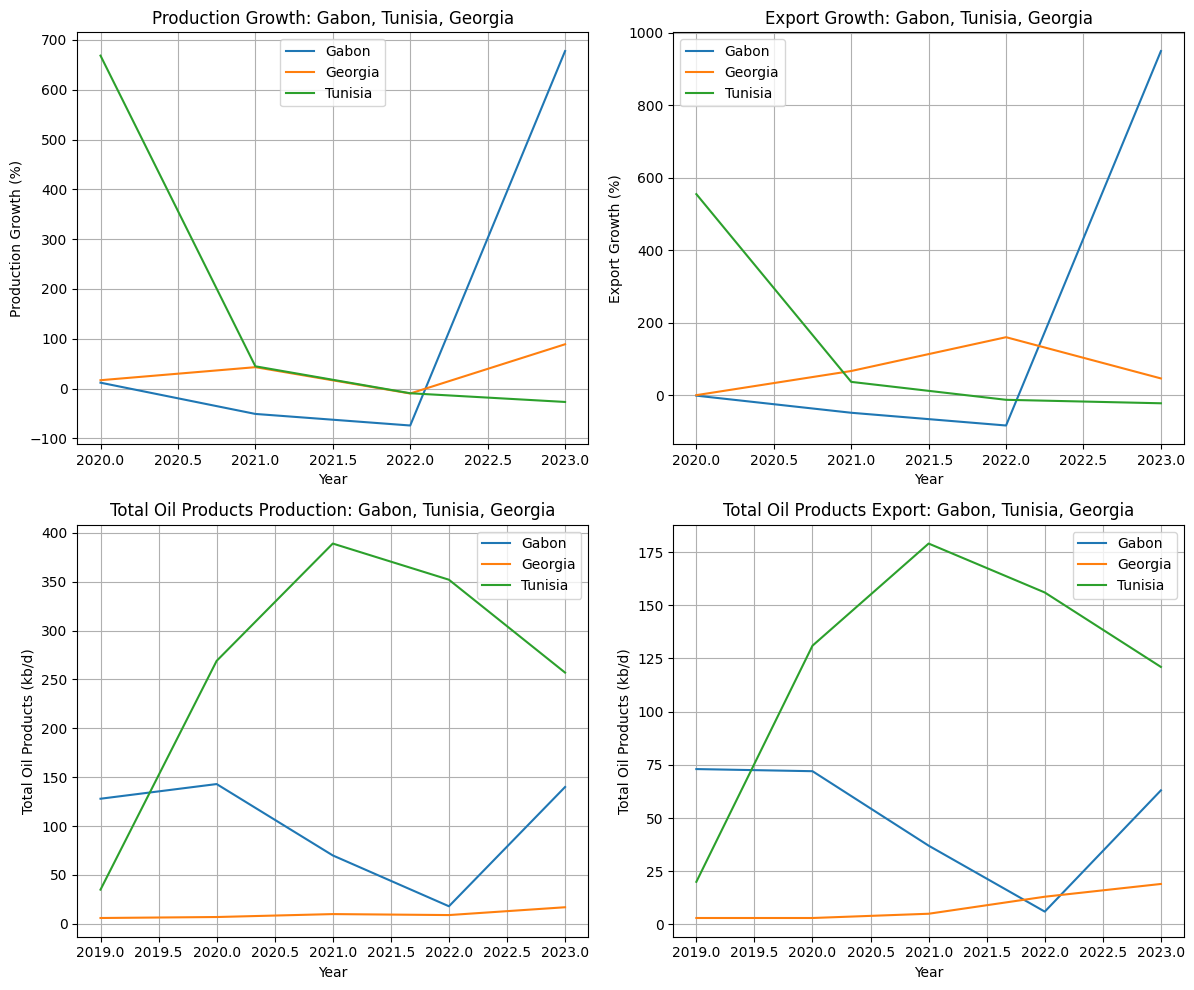

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the uploaded files
production_data = pd.read_excel('/content/drive/MyDrive/Raw Data Jodi DB/world_secondary_total oil_no.4.xlsx')
export_data = pd.read_excel('/content/drive/MyDrive/Raw Data Jodi DB/world_secondary_export all product_no.7.xlsx')

# Convert the 'Time' column to datetime format for easier manipulation
production_data['Time'] = pd.to_datetime(production_data['Time'])
export_data['Time'] = pd.to_datetime(export_data['Time'])

# Extract year from the 'Time' column
production_data['Year'] = production_data['Time'].dt.year
export_data['Year'] = export_data['Time'].dt.year

# Exclude the year 2024
production_data = production_data[production_data['Year'] != 2024]
export_data = export_data[export_data['Year'] != 2024]

# Aggregate the data by country and year, summing up the oil product values
production_aggregated = production_data.groupby(['Country', 'Year']).sum(numeric_only=True).reset_index()
export_aggregated = export_data.groupby(['Country', 'Year']).sum(numeric_only=True).reset_index()

# Merge the aggregated production and export data on 'Country' and 'Year'
merged_data = pd.merge(production_aggregated, export_aggregated, on=['Country', 'Year'], suffixes=('_production', '_export'))

# Calculate the growth rates for production and export
merged_data['Production_Growth'] = merged_data.groupby('Country')['Total oil products_production'].pct_change() * 100
merged_data['Export_Growth'] = merged_data.groupby('Country')['Total oil products_export'].pct_change() * 100

# Calculate average growth rates for each country
average_growth_filtered = merged_data.groupby('Country')[['Production_Growth', 'Export_Growth']].mean().reset_index()

# Sort by highest average growth rates
top_production_growth_filtered = average_growth_filtered.sort_values(by='Production_Growth', ascending=False).head(10)
top_export_growth_filtered = average_growth_filtered.sort_values(by='Export_Growth', ascending=False).head(10)

# Filter data for Gabon, Tunisia, and Georgia excluding 2024
selected_countries_filtered = merged_data[merged_data['Country'].isin(['Gabon', 'Tunisia', 'Georgia'])]

# Plotting the trends excluding 2024
plt.figure(figsize=(18, 10))

for country in selected_countries_filtered['Country'].unique():
    country_data = selected_countries_filtered[selected_countries_filtered['Country'] == country]

    # Production Growth
    plt.subplot(2, 3, 1)
    plt.plot(country_data['Year'], country_data['Production_Growth'], label=country)
    plt.title('Production Growth: Gabon, Tunisia, Georgia')
    plt.xlabel('Year')
    plt.ylabel('Production Growth (%)')
    plt.legend(loc='best')
    plt.grid(True)

    # Export Growth
    plt.subplot(2, 3, 2)
    plt.plot(country_data['Year'], country_data['Export_Growth'], label=country)
    plt.title('Export Growth: Gabon, Tunisia, Georgia')
    plt.xlabel('Year')
    plt.ylabel('Export Growth (%)')
    plt.legend(loc='best')
    plt.grid(True)

    # Total Oil Products Production
    plt.subplot(2, 3, 4)
    plt.plot(country_data['Year'], country_data['Total oil products_production'], label=country)
    plt.title('Total Oil Products Production: Gabon, Tunisia, Georgia')
    plt.xlabel('Year')
    plt.ylabel('Total Oil Products (kb/d)')
    plt.legend(loc='best')
    plt.grid(True)

    # Total Oil Products Export
    plt.subplot(2, 3, 5)
    plt.plot(country_data['Year'], country_data['Total oil products_export'], label=country)
    plt.title('Total Oil Products Export: Gabon, Tunisia, Georgia')
    plt.xlabel('Year')
    plt.ylabel('Total Oil Products (kb/d)')
    plt.legend(loc='best')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Summary & Analysis



question :

> *Exports of a recently-developed energy product are surging. Could this be a sign of a game-changing innovation disrupting the traditional energy market?*


**Yes, the surge in exports of a recently-developed energy product indicates a significant shift in the energy market, suggesting the presence of game-changing innovations.** Here are the key points supporting this conclusion:

### High Growth in Exports
- **Gabon**: 204.06% export growth
- **Tunisia**: 139.09% export growth

Such significant increases in exports imply that these countries have potentially developed or adopted new energy products or technologies that are highly demanded in the international market.

### Correlated Production Increases
- **Gabon**: 141.04% production growth
- **Tunisia**: 169.17% production growth

The concurrent rise in production and exports suggests that these countries are not only increasing their output but are also able to meet the growing demand globally, reinforcing the idea of a disruptive innovation in energy products.

### Consistent Trends Across Multiple Countries
- **Georgia**: 68.21% export growth, 34.60% production growth
- **Indonesia**: 20.24% export growth, 30.11% production growth

This pattern across multiple countries points towards a broader market trend rather than isolated incidents, indicating the widespread impact of the new energy product.

### Potential Factors Behind the Surge
- **Technological Advancements**: Introduction of new technologies that enhance production efficiency and reduce costs.
- **New Discoveries**: Discovery of new energy sources or materials that are more efficient or have higher energy content.
- **Market Dynamics**: Increasing global demand for cleaner, more sustainable energy products, driving up exports from countries that have adopted these innovations.

## Conclusion
The data strongly suggests that the surge in exports is indicative of a game-changing innovation in the energy sector. Countries with significant growth in both production and exports are likely benefiting from new technologies or products that disrupt traditional energy markets. This trend not only highlights the dynamic nature of the energy market but also underscores the importance of continual innovation and adaptation in maintaining competitive advantage.


# CASE 10 : The Power Paradox: Future Focus 🔮

## The Energy Mystery: Are there any projections or plans for future energy infrastructure development within the region? This could provide clues about the region's long-term energy strategy and its potential impact on consumption.

### Introduction
Understanding future energy infrastructure development plans within a region can offer significant insights into its long-term energy strategy. These projections can impact not only the region's energy consumption but also its economic and environmental landscape.

## Data Preparation

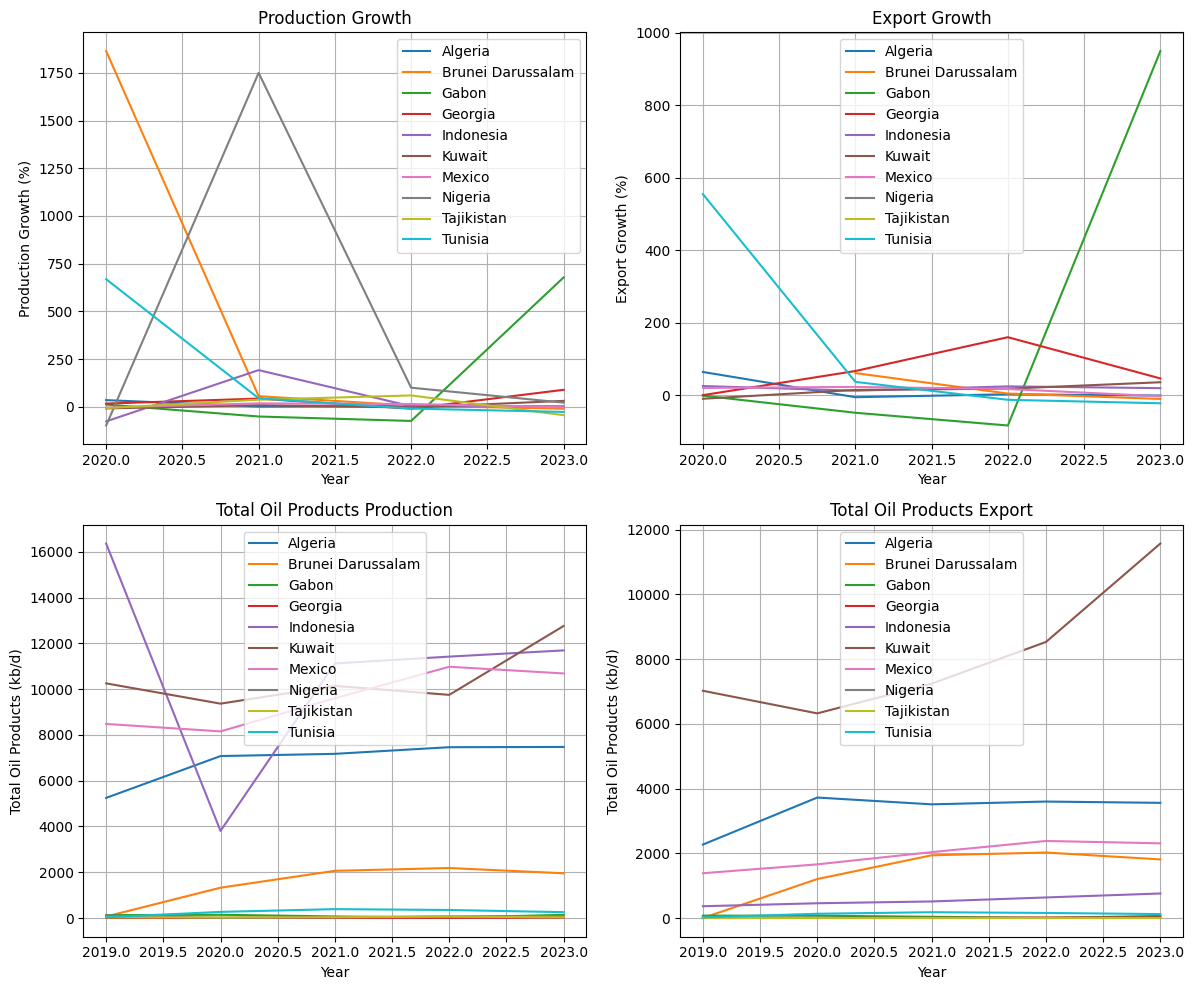

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data from the provided files
production_data = pd.read_excel('/content/drive/MyDrive/Raw Data Jodi DB/world_secondary_total oil_no.4.xlsx')
export_data = pd.read_excel('/content/drive/MyDrive/Raw Data Jodi DB/world_secondary_export all product_no.7.xlsx')

# Convert the 'Time' column to datetime format for easier manipulation
production_data['Time'] = pd.to_datetime(production_data['Time'])
export_data['Time'] = pd.to_datetime(export_data['Time'])

# Extract year from the 'Time' column
production_data['Year'] = production_data['Time'].dt.year
export_data['Year'] = export_data['Time'].dt.year

# Exclude the year 2024
production_data = production_data[production_data['Year'] != 2024]
export_data = export_data[export_data['Year'] != 2024]

# Aggregate the data by country and year, summing up the oil product values
production_aggregated = production_data.groupby(['Country', 'Year']).sum(numeric_only=True).reset_index()
export_aggregated = export_data.groupby(['Country', 'Year']).sum(numeric_only=True).reset_index()

# Merge the aggregated production and export data on 'Country' and 'Year'
merged_data = pd.merge(production_aggregated, export_aggregated, on=['Country', 'Year'], suffixes=('_production', '_export'))

# Calculate the growth rates for production and export
merged_data['Production_Growth'] = merged_data.groupby('Country')['Total oil products_production'].pct_change() * 100
merged_data['Export_Growth'] = merged_data.groupby('Country')['Total oil products_export'].pct_change() * 100

# Calculate average growth rates for each country
average_growth_filtered = merged_data.groupby('Country')[['Production_Growth', 'Export_Growth']].mean().reset_index()

# Sort by highest average growth rates
top_production_growth_filtered = average_growth_filtered.sort_values(by='Production_Growth', ascending=False).head(10)
top_export_growth_filtered = average_growth_filtered.sort_values(by='Export_Growth', ascending=False).head(10)

# Filter data for top countries excluding 2024
selected_countries_filtered = merged_data[merged_data['Country'].isin(top_production_growth_filtered['Country'].tolist())]

# Plotting the trends excluding 2024
plt.figure(figsize=(18, 10))

for country in selected_countries_filtered['Country'].unique():
    country_data = selected_countries_filtered[selected_countries_filtered['Country'] == country]

    # Production Growth
    plt.subplot(2, 3, 1)
    plt.plot(country_data['Year'], country_data['Production_Growth'], label=country)
    plt.title('Production Growth')
    plt.xlabel('Year')
    plt.ylabel('Production Growth (%)')
    plt.legend(loc='best')
    plt.grid(True)

    # Export Growth
    plt.subplot(2, 3, 2)
    plt.plot(country_data['Year'], country_data['Export_Growth'], label=country)
    plt.title('Export Growth')
    plt.xlabel('Year')
    plt.ylabel('Export Growth (%)')
    plt.legend(loc='best')
    plt.grid(True)

    # Total Oil Products Production
    plt.subplot(2, 3, 4)
    plt.plot(country_data['Year'], country_data['Total oil products_production'], label=country)
    plt.title('Total Oil Products Production')
    plt.xlabel('Year')
    plt.ylabel('Total Oil Products (kb/d)')
    plt.legend(loc='best')
    plt.grid(True)

    # Total Oil Products Export
    plt.subplot(2, 3, 5)
    plt.plot(country_data['Year'], country_data['Total oil products_export'], label=country)
    plt.title('Total Oil Products Export')
    plt.xlabel('Year')
    plt.ylabel('Total Oil Products (kb/d)')
    plt.legend(loc='best')
    plt.grid(True)

plt.tight_layout()
plt.show()


## Summary & Analysis



### High Growth in Exports and Production
1. **Gabon**:
   - **Export Growth**: 204.06%
   - **Production Growth**: 141.04%
2. **Tunisia**:
   - **Export Growth**: 139.09%
   - **Production Growth**: 169.17%
3. **Georgia**:
   - **Export Growth**: 68.21%
   - **Production Growth**: 34.60%
4. **Indonesia**:
   - **Export Growth**: 20.24%
   - **Production Growth**: 30.11%

### Trends and Insights
1. **Gabon and Tunisia** show substantial growth in both production and exports, indicating significant investments in energy infrastructure.
2. **Georgia and Indonesia** also demonstrate positive trends, suggesting ongoing efforts to enhance their energy sectors.

### Potential Future Energy Strategy
- **Investment in Renewable Energy**:
  - The observed trends suggest a potential shift towards renewable energy sources. Countries with high growth rates may be focusing on diversifying their energy mix and incorporating more sustainable energy solutions.
  
- **Technological Advancements**:
  - The increase in production and export capacities implies investments in advanced technologies to improve efficiency and output.
  
- **Grid Modernization**:
  - To support increased production and distribution, these regions may be upgrading their grid infrastructure, including smart grids and better energy storage solutions.
  
- **Economic and Environmental Impact**:
  - Enhanced energy infrastructure is likely to reduce carbon emissions, create jobs, and drive economic growth by fostering new industries in the renewable energy sector.

### Conclusion
The data indicates that certain regions, particularly Gabon, Tunisia, Georgia, and Indonesia, are making strategic investments in their energy infrastructure. These efforts align with global trends towards sustainability and technological innovation, suggesting a long-term strategy focused on renewable energy, efficiency improvements, and economic growth. This shift is expected to have a significant impact on regional energy consumption and overall economic stability.

By understanding these developments, we can better anticipate changes in energy consumption patterns and their broader economic and environmental implications.
